# AVOCADO PROJECT No.01

### Problem Statement:

The avocado (Persea americana) is a medium-sized, evergreen tree in the laurel family. It is native to the Americas and they use for daily food.

Content:
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV file.

Data represents weekly 2018 retail scan data for National retail volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Avocado-Prices-Prediction

#### The objective of this project is to predict the price of avocado sold in the US using historical dataset.

### importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\RSarkar\Desktop\phase 1 project\avocado1.csv')

df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
#The Total number of data (same as df)
df.shape

(18249, 14)

In [4]:
#Displaying the columns of dataset
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

-As mentioned in the problem statement the columns are :-
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

- We see the size of dataset is very huge and we have two problem statement to find the region of where the avacado was observed 

- And to find the average price of the said Avacado which is a Regression as well as Classification problem

In [5]:
df.head() #to see 5 first row of dataset

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

# EDA

In [6]:
# Checking for NULL values if any in the data frame
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We see that this dataset has no null values so we wll go to the next step 

In [7]:
# Dataset information and check for null Values 
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


As we see the above details of dataset:

Dataset has 18249 rows and 14 columns 

Name of the columns are : ['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region']
       
Only the columns"Date" and "type" are Object, "Unnamed: 0" and "year" are Integers and rest are float in nature.


In [8]:
# Checking for Duplicate Values
df.drop_duplicates(inplace=True)

### As we see : 
    Dataset has no-Null value
    
    Data 'type' has two unique data 'Conventional' & 'Organic'
    
    We have two target columns one of is 'average price' and another 'region', so we have to perform both model building regression and classification
    
    For the 'date' and 'region' columns we have to convert its type into integer or numeric
    
    We have year column if Day and Month can split then Date column type will change

In [9]:
# Check the datatypes of the columns 
df.dtypes 

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Observations after viewing the dataset:_

- we have two target columns one is average price and the other is region so we will have to perform model building for both regression as well as classification problem

- we see that date is object type so we need to convert it into int type or numeric type 

- we need to convert region into int type as well so that the model can predict only numerical data

- we need to treat type as wellas it is object and we can use  encoding to do so 
 

In [10]:
#Encoding the 'date' column
df["Date_day"] = pd.to_datetime(df.Date, format="%Y/%m/%d").dt.day

In [11]:
df["Date_month"] = pd.to_datetime(df["Date"], format = "%Y/%m/%d").dt.month

In [12]:
df.drop(['Date','Unnamed: 0'],axis=1,inplace=True)

In [13]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

           Date_day    Date_month  
count  18249.000000  18249.000000  
mean      15.662612      6.177215  
std        8.776281      3.534130  
min        1.000000      1.000000  
25%        8.000000      3.000000  
50%       16.000000      6.000000  
75%       23.000000      9.000000  
max       31.000000     12.000000

In [14]:
df.drop(df[df['Total Volume'] < 1].index, inplace = True) #checking to see any 0 values present

In [15]:
df.shape

(18249, 14)

In [16]:
#Checking to see the unique values in the columns

In [17]:
df['AveragePrice'].nunique() # we see there are some examples of unique data in the target variable AveragePrice

259

In [18]:
#lets check for the categoriacal target variable as we will need to treat them 

df['region'].unique() 

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [19]:
# Checking the unique values in each column

for col in df:
    print(df[col].nunique(),'\n')

259 

18237 

17702 

18103 

12071 

18097 

17321 

15082 

5588 

2 

4 

54 

31 

12 



In [20]:
df['type'].unique() # we see all the values in this column

array(['conventional', 'organic'], dtype=object)

In [21]:
df['year'].unique() # shows us the 4 years this data has been derived from

array([2015, 2016, 2017, 2018], dtype=int64)

In [22]:
# Checking to see if any of the values in Target 1 is white spaces

df.loc[df['AveragePrice'] == " "]

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Date_day, Date_month]
Index: []

In [23]:
# Checking to see if any of the values in Target 2 is white spaces

df.loc[df['region'] == " "]

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Date_day, Date_month]
Index: []

 As we see that both the targets have no whitespaces we can move ahead

### Splitting the columns with categorical and numerica data

In [24]:
# We are defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Date_day', 'Date_month']

We have 2 categorical features : ['type', 'region']


In [25]:
numeric_features = [feature for feature in df.columns if df[feature].dtype !="0"]
categorical_features = [feature for feature in df.columns if df[feature].dtype =="0"]

#print columns 
print

<function print>

In [26]:
df_visualization_continuous=df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Date_day', 'Date_month']].copy()

In [27]:
df_visualization_nominal=df[['type', 'region']]

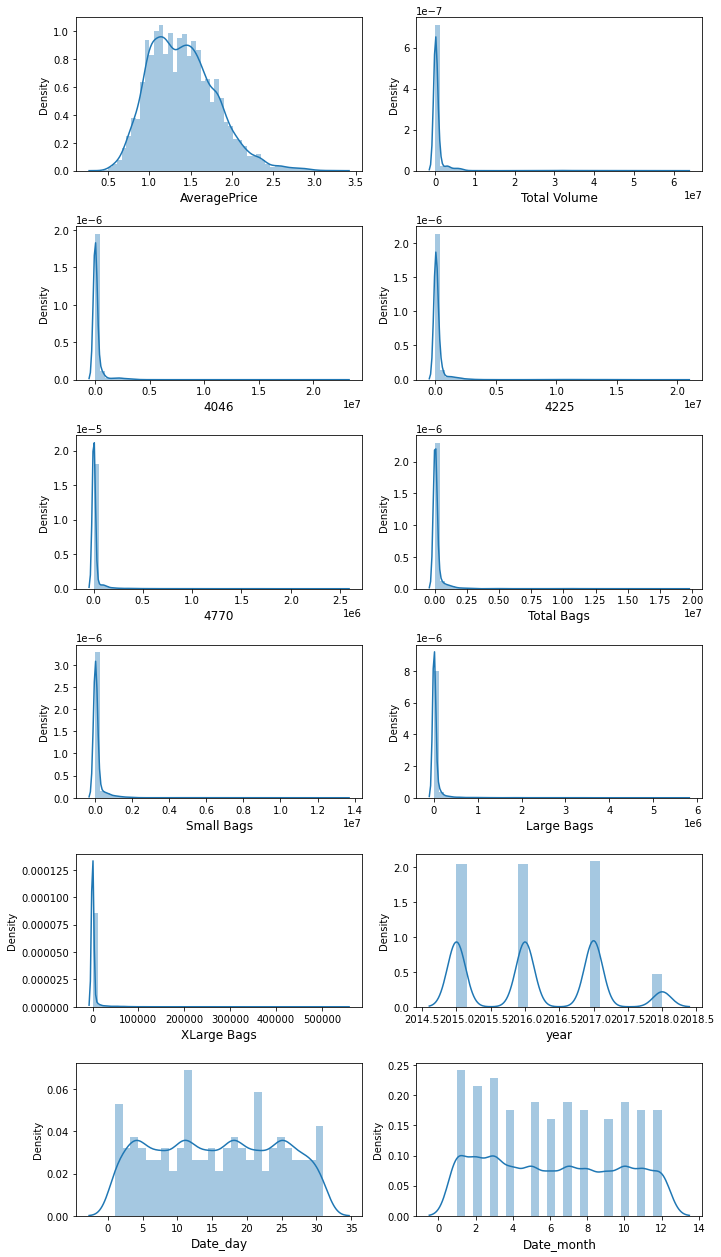

In [28]:
#Lets see how the data is distributed for every column

plt.figure(figsize =(10,20), facecolor = 'white')
plotnumber = 1

for column in df_visualization_continuous:
    if plotnumber <=14:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(df_visualization_continuous[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

# Observations :-
    
   - We see that the columns 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' all are showing a very similar pattern in the distplot
        

## Lets graph the data for columns individually so we can make clear findings

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

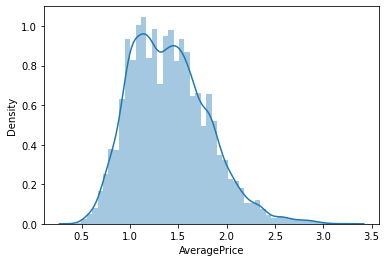

In [29]:
sns.distplot(df['AveragePrice'],kde=True,)

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

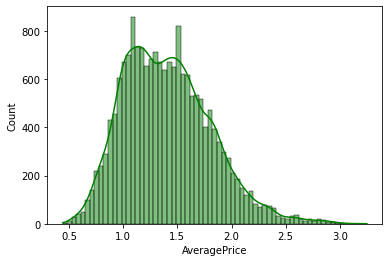

In [30]:
sns.histplot(x=df.AveragePrice, ec = "black", color='g', kde=True)

This is one of the target variable where we see there is normal distribution relatively , we also see a high spike between 1 and 1.2 approx and some skewness from 2.5 to 3.0 and beyond , but as this is the target variable we will not be able to do anything at this point, for the region as target we can treat this for classification problem 

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

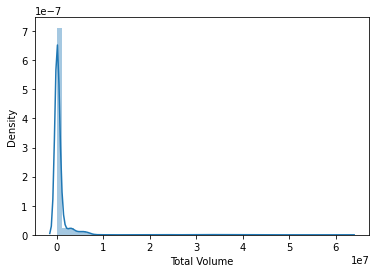

In [31]:
sns.distplot(df['Total Volume'],kde=True,)

<AxesSubplot:xlabel='Total Volume', ylabel='Count'>

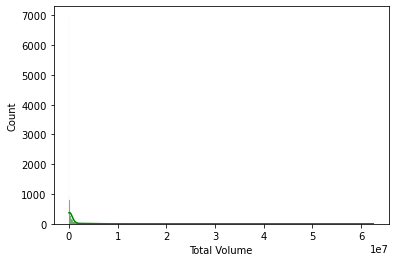

In [32]:
sns.histplot(x=df['Total Volume'], ec = "black", color='g', kde=True)

The column is being shown like this as there are many outliers to the right but apart from that once treated it shows that it may have normal distribution , so we will need to treat it to understand.

Most values lies from 0 to 0.5 approx and a few of them are going all the way upto 6-7 approx

<AxesSubplot:xlabel='4046', ylabel='Density'>

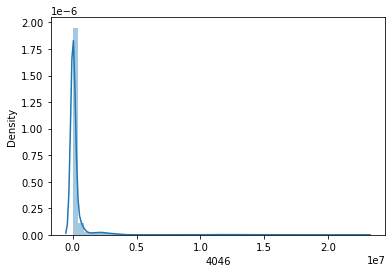

In [33]:
sns.distplot(df['4046'],kde=True,)

<AxesSubplot:xlabel='4046', ylabel='Count'>

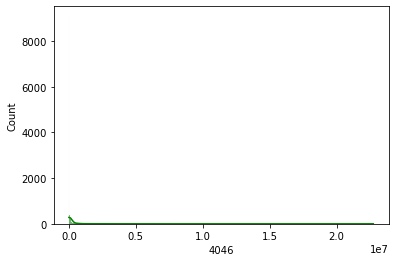

In [34]:
sns.histplot(x=df['4046'], ec = "black", color='g', kde=True)

The column is being shown like this as there are many outliers to the right but apart from that once treated it shows that it may have normal distribution , so we will need to treat it to understand.

Most values lies from 0 to 0.5 approx and a few of them are going all the way upto 2-3 approx

Very similar graph to Total Volume , need to check for multicollinearity problem 

<AxesSubplot:xlabel='4225', ylabel='Density'>

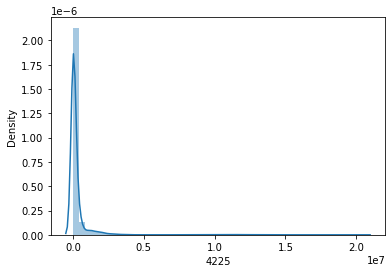

In [35]:
sns.distplot(df['4225'],kde=True,)

<AxesSubplot:xlabel='4225', ylabel='Count'>

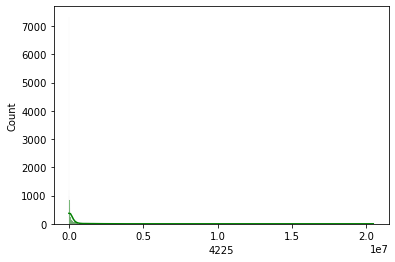

In [36]:
sns.histplot(x=df['4225'], ec = "black", color='g', kde=True)

The column is being shown like this as there are many outliers to the right but apart from that once treated it shows that it may have normal distribution , so we will need to treat it to understand.

Most values lies from 0 to 0.5 approx and a few of them are going all the way upto 2-2.2 approx

Very similar graph to Total Volume, 4046 , need to check for multicollinearity problem 

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

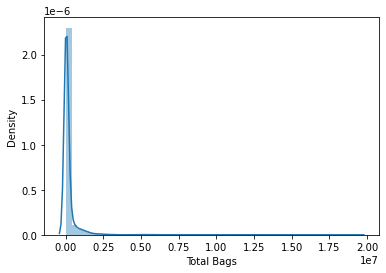

In [37]:
sns.distplot(df['Total Bags'],kde=True,)

<AxesSubplot:xlabel='Total Bags', ylabel='Count'>

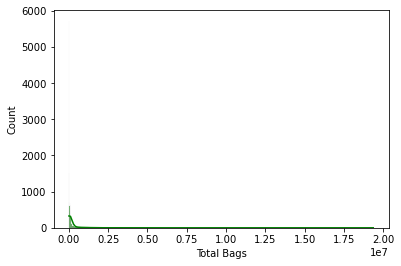

In [38]:
sns.histplot(x=df['Total Bags'], ec = "black", color='g', kde=True)

The column is being shown like this as there are many outliers to the right but apart from that once treated it shows that it may have normal distribution , so we will need to treat it to understand.

Most values lies from 0 to 0.5 approx and a few of them are going all the way upto 1.8-2 approx

Very similar graph to Total Volume,4046,4225 need to check for multicollinearity problem 

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

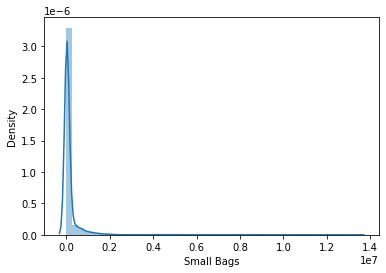

In [39]:
sns.distplot(df['Small Bags'],kde=True,)

<AxesSubplot:xlabel='Small Bags', ylabel='Count'>

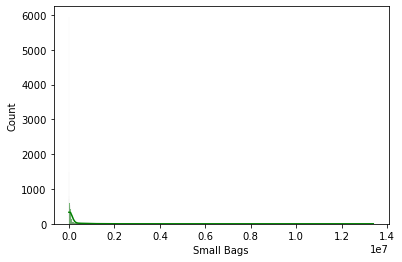

In [40]:
sns.histplot(x=df['Small Bags'], ec = "black", color='g', kde=True)

The column is being shown like this as there are many outliers to the right but apart from that once treated it shows that it may have normal distribution , so we will need to treat it to understand.

Most values lies from 0 to 0.5 approx and a few of them are going all the way upto 1.3 to 1.4  approx

Very similar graph to Total Volume,4046,4225,Small bags need to check for multicollinearity problem 

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

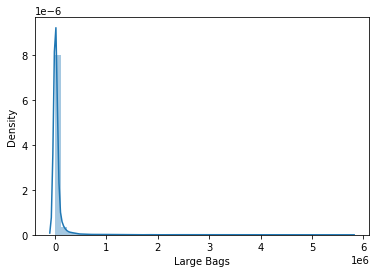

In [41]:
sns.distplot(df['Large Bags'],kde=True,)

<AxesSubplot:xlabel='Large Bags', ylabel='Count'>

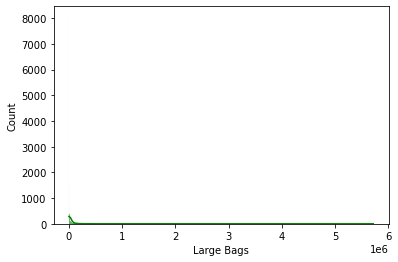

In [42]:
sns.histplot(x=df['Large Bags'], ec = "black", color='g', kde=True)

The column is being shown like this as there are many outliers to the right but apart from that once treated it shows that it may have normal distribution , so we will need to treat it to understand.

Most values lies from 0 to 0.5 approx and a few of them are going all the way upto 5-6 approx

Very similar graph to Total Volume,4046,4225,Small bags need to check for multicollinearity problem 

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

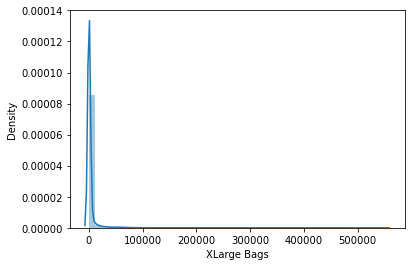

In [43]:
sns.distplot(df['XLarge Bags'],kde=True,)

<AxesSubplot:xlabel='XLarge Bags', ylabel='Count'>

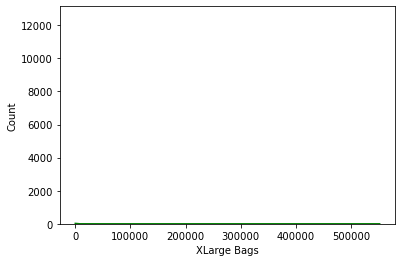

In [44]:
sns.histplot(x=df['XLarge Bags'], ec = "black", color='g', kde=True)

The column is being shown like this as there are many outliers to the right but apart from that once treated it shows that it may have normal distribution , so we will need to treat it to understand.

Most values lies from 0 to 0.5 approx and a few of them are going all the way upto 50000 to 60000  approx

Very similar graph to Total Volume,4046,4225,Small bags,LArge bags need to check for multicollinearity problem 

<AxesSubplot:xlabel='year', ylabel='Density'>

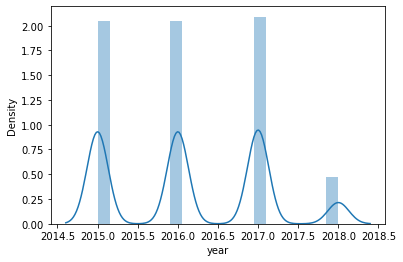

In [45]:
sns.distplot(df['year'],kde=True,)

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


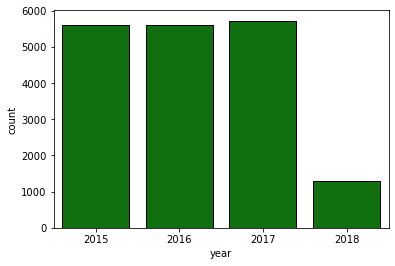

In [46]:
sns.countplot(x=df.year, ec = "black", color='g', )
print(df['year'].value_counts())

The year column is pretty straight forward we see that it has 4 years and 2015 to 2017 being the most , we see that 2018 is the least. We also see the graphical representation in the count table

<AxesSubplot:xlabel='Date_day', ylabel='Density'>

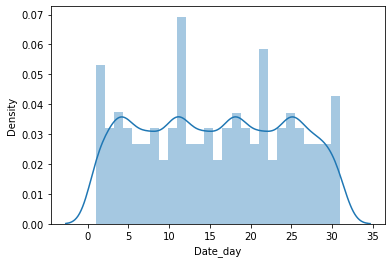

In [47]:
sns.distplot(df['Date_day'],kde=True,)

<AxesSubplot:xlabel='Date_day', ylabel='Count'>

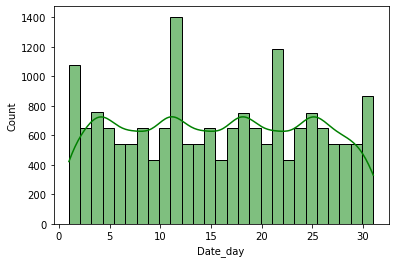

In [48]:
sns.histplot(x=df.Date_day, ec = "black", color='g', kde=True)

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Date_day, dtype: int64


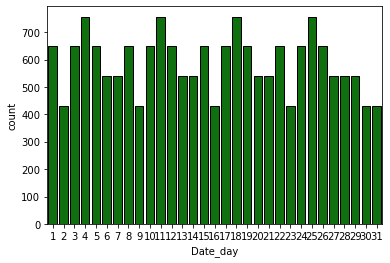

In [49]:
sns.countplot(x=df.Date_day, ec = "black", color='g', )
print(df['Date_day'].value_counts())

In the Day column we see that there is fluctuation of transactions , some observations we can see is 

- highest no of transactions on 4,11,18,25
- more transactions towards the end of month on 25th , 26th but much lesser on last days 30 and 31st
- lowest transactions on 2, 9,23,30,31,16

<AxesSubplot:xlabel='Date_month', ylabel='Density'>

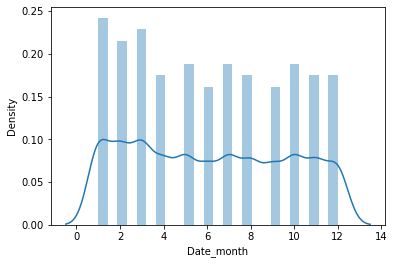

In [50]:
sns.distplot(df['Date_month'],kde=True,)

<AxesSubplot:xlabel='Date_month', ylabel='Count'>

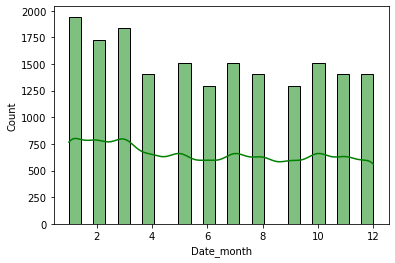

In [51]:
sns.histplot(x=df.Date_month, ec = "black", color='g', kde=True)

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Date_month, dtype: int64


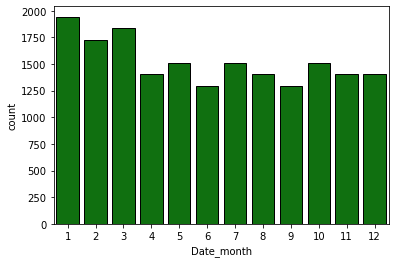

In [52]:
sns.countplot(x=df.Date_month, ec = "black", color='g', )
print(df['Date_month'].value_counts())

In the month column we see that the 1st month has the highest no of transactions while the 6th month has the lwest , but overall we see uniform distribution of records on all the month for the similar amounts

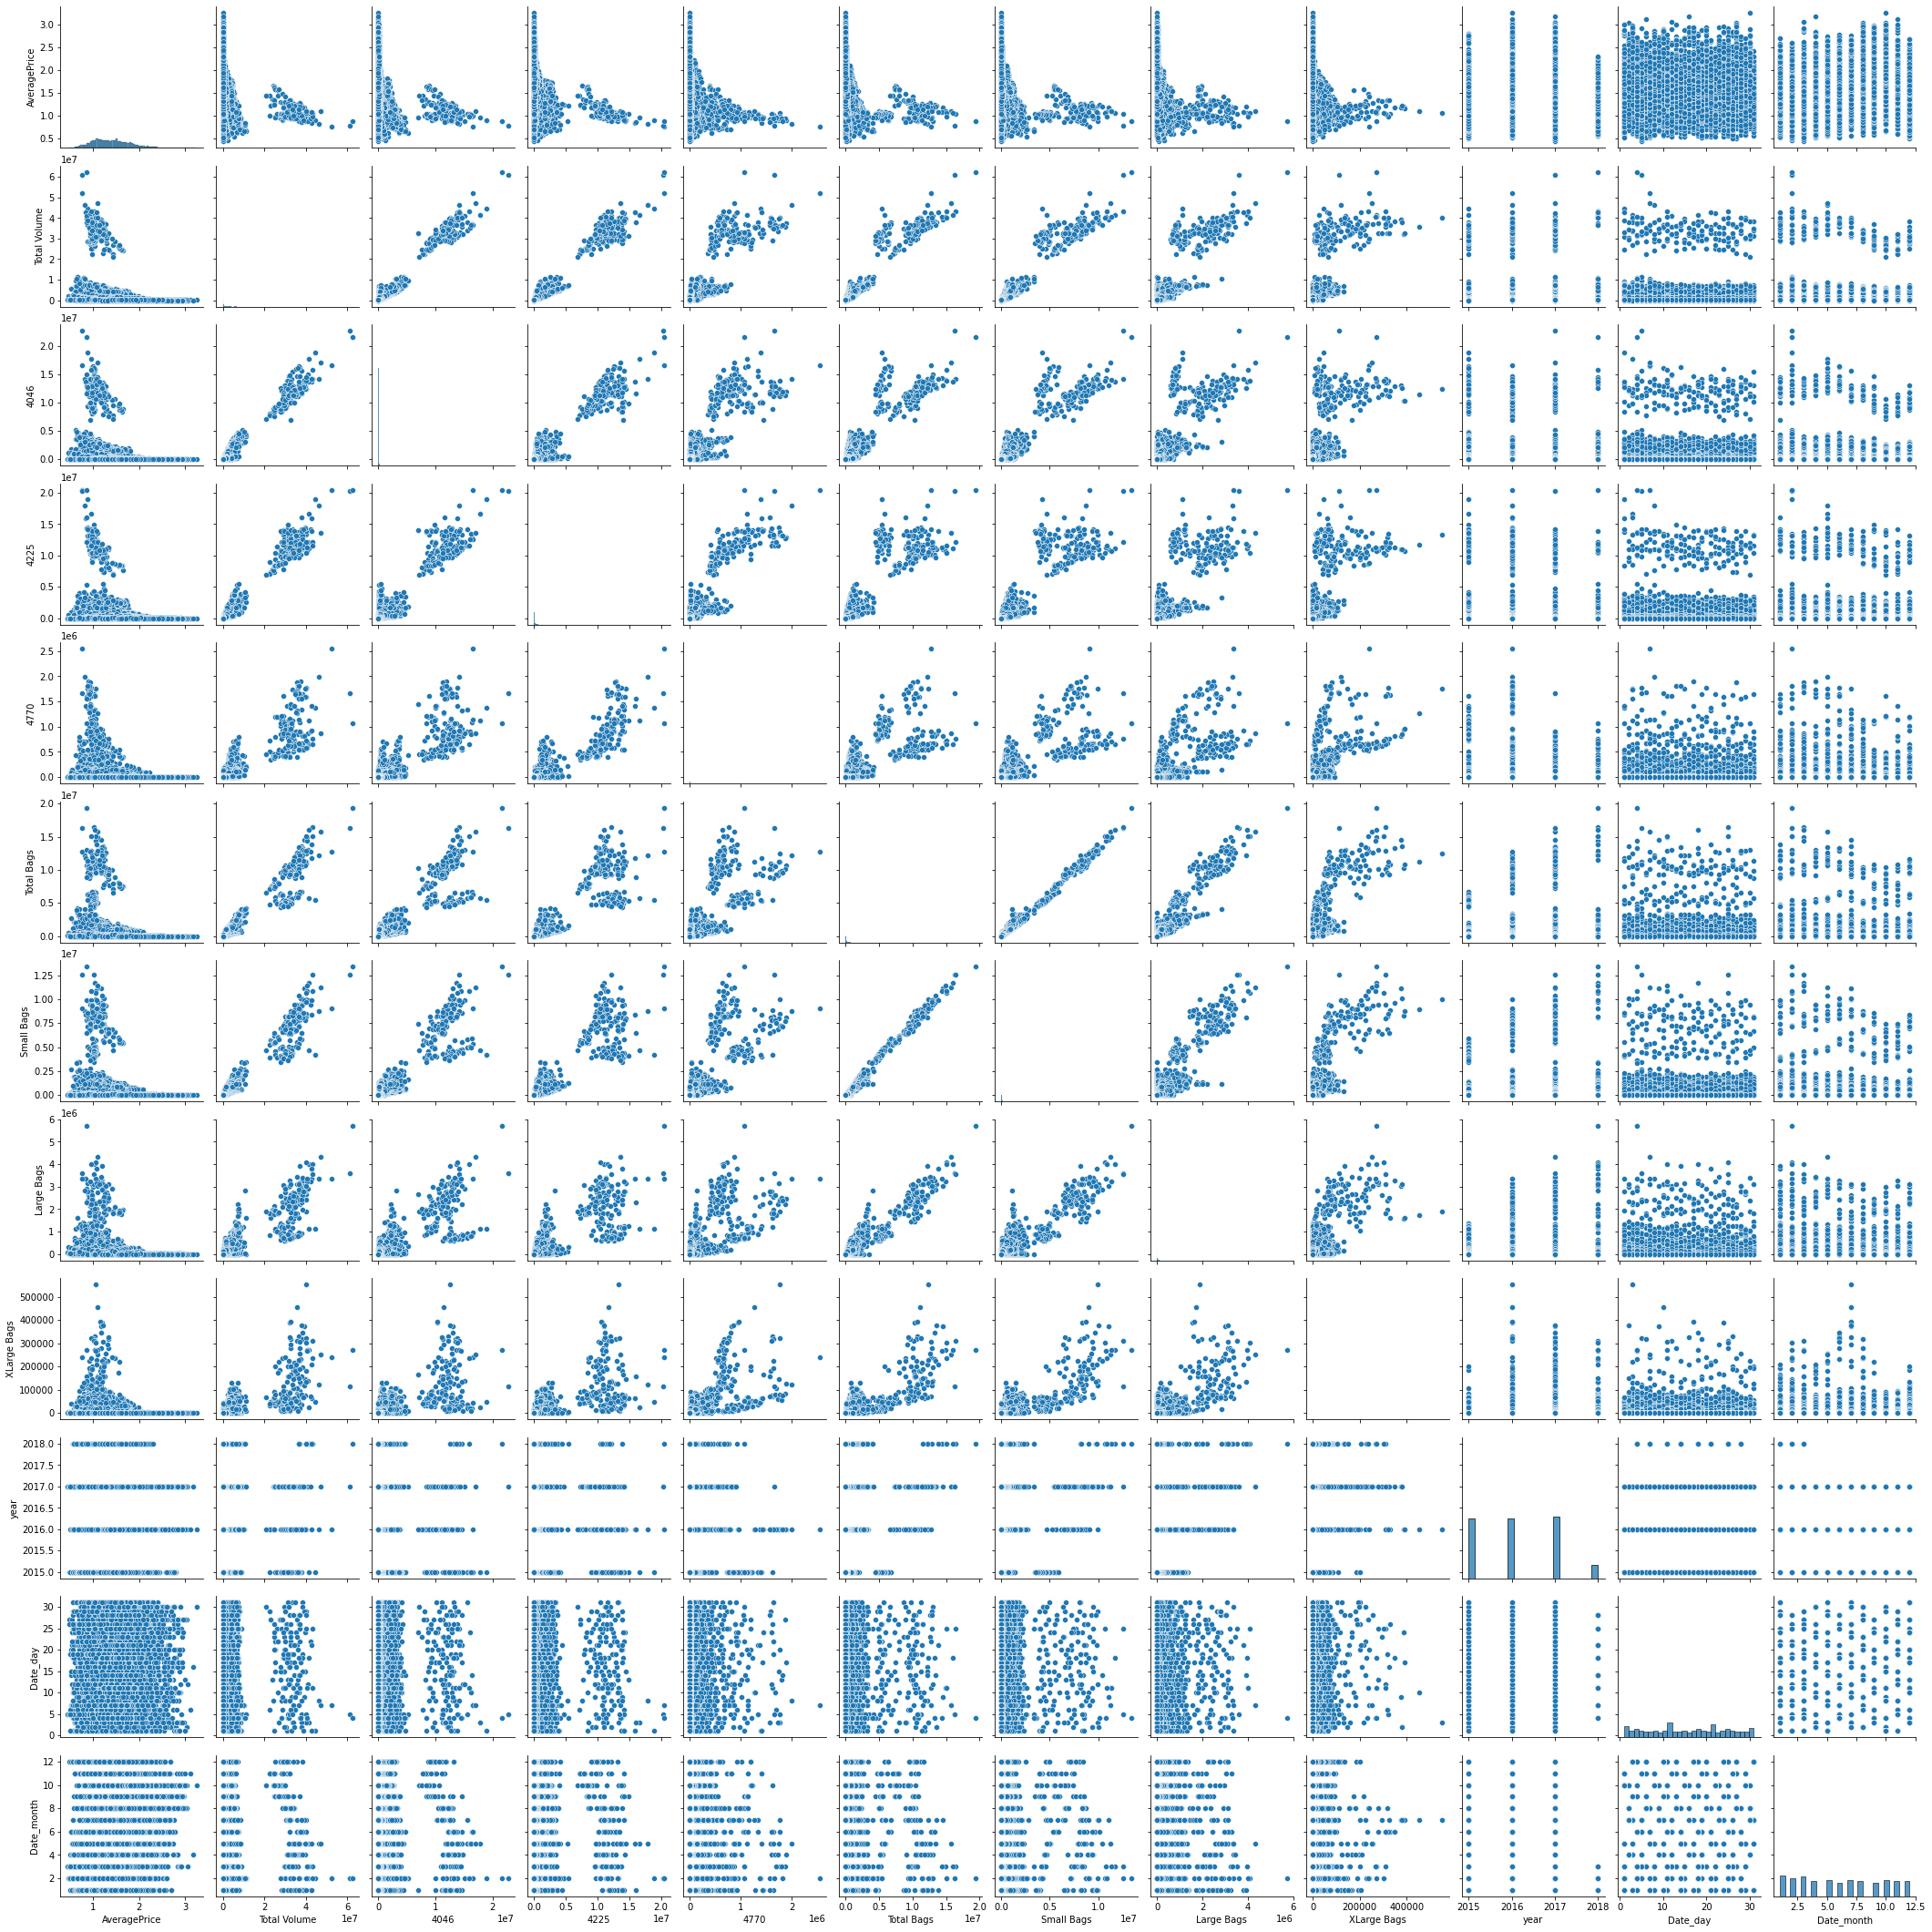

In [53]:
sns.pairplot(df)

## We see a number of observation in the pairplot , but the relatuionship is very hard to pinpoint so we will need to plot different relationship plots to find the actual reletionship between the columns

# Visualization of the categorical features

conventional    9126
organic         9123
Name: type, dtype: int64


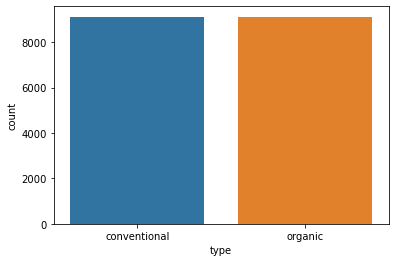

In [54]:
#Lets see the representation individually now with each column 'type', 'region'

ax = sns.countplot(x='type',data = df_visualization_nominal)
print(df_visualization_nominal['type'].value_counts())

In this plot we see almost equal amount of records in the 2 types , just 3 difference is seen among the 2 and conventional being the greater by a small margin

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

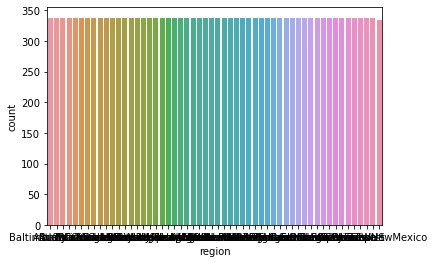

In [55]:
#Lets see the representation individually now with each column

ax = sns.countplot(x='region',data = df_visualization_nominal)
print(df_visualization_nominal['region'].value_counts())

<AxesSubplot:xlabel='region', ylabel='Count'>

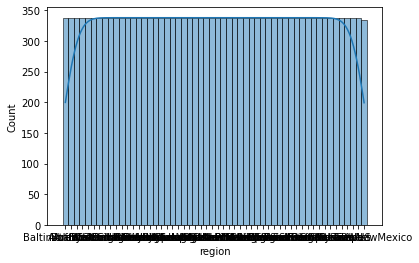

In [56]:
sns.histplot(df['region'],kde=True,)

This is the 2nd Traget variable which we will use for classification , we observe here :-
    
    - the records for all the regions is identical except for WestTexNewMexico which is less by 3 all the region have 338 transactions , so the model will have to use the other features to determine the region here

# Encoding the categorical Features to numerical features

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
enc=LabelEncoder()

In [59]:
for i in df.columns:
    if df[i].dtypes =="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [60]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Date_day          int64
Date_month        int64
dtype: object

In [61]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Date_day  \
0         8603.62       93.25          0.0     0  2015       0        27   
1         9408.07       97.49          0.0     0  2015       0        20   
2         8042.21      103.14          0.0     0  2015       0        13   
3         5677.40      133.76          0.0     0  2015       0         6   
4         5986.26      197.69          0.0     0  2015       0        29   
...           ...         ...          ...   ...   ...     ...       ...   
18244    13066.82      431.85          0.0     1  2018      53         4   
18245     8940.04      324.80          0.0     1  2018      53        28   
18246     9351.80       42.31          0.0     1  2018      53        21   
18247    10919.54       50.00          0.0     1  2018      53        14   
18248    11988.14       26.01          0.0     1  2018      53         7   

       Date_month  
0              12  
1              12  
2              12  
3              12  
4              11  
...           ...  
18244           2  
18245           1  
18246           1  
18247           1  
18248           1  

[18249 rows x 14 columns]

In [62]:
df['region'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [63]:
df['type'].unique() 

array([0, 1])

We have converted the categorical data to type and region to numerical data we can move ahead now 

### Visualizing the relationship between the features and the 1st target variable - AveragePrice

In [64]:
#Divide data into features and label

x = df.drop(columns = ['AveragePrice'])
y = df['AveragePrice']

In [65]:
x

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags  type  year  region  Date_day  Date_month  
0           93.25          0.0     0  2015       0        27          12  
1           97.49          0.0     0  2015       0        20          12  
2          103.14          0.0     0  2015       0        13          12  
3          133.76          0.0     0  2015       0         6          12  
4          197.69          0.0     0  2015       0        29          11  
...           ...          ...   ...   ...     ...       ...         ...  
18244      431.85          0.0     1  2018      53         4           2  
18245      324.80          0.0     1  2018      53        28           1  
18246       42.31          0.0     1  2018      53        21           1  
18247       50.00          0.0     1  2018      53        14           1  
18248       26.01          0.0     1  2018      53         7           1  

[18249 rows x 13 columns]

In [66]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

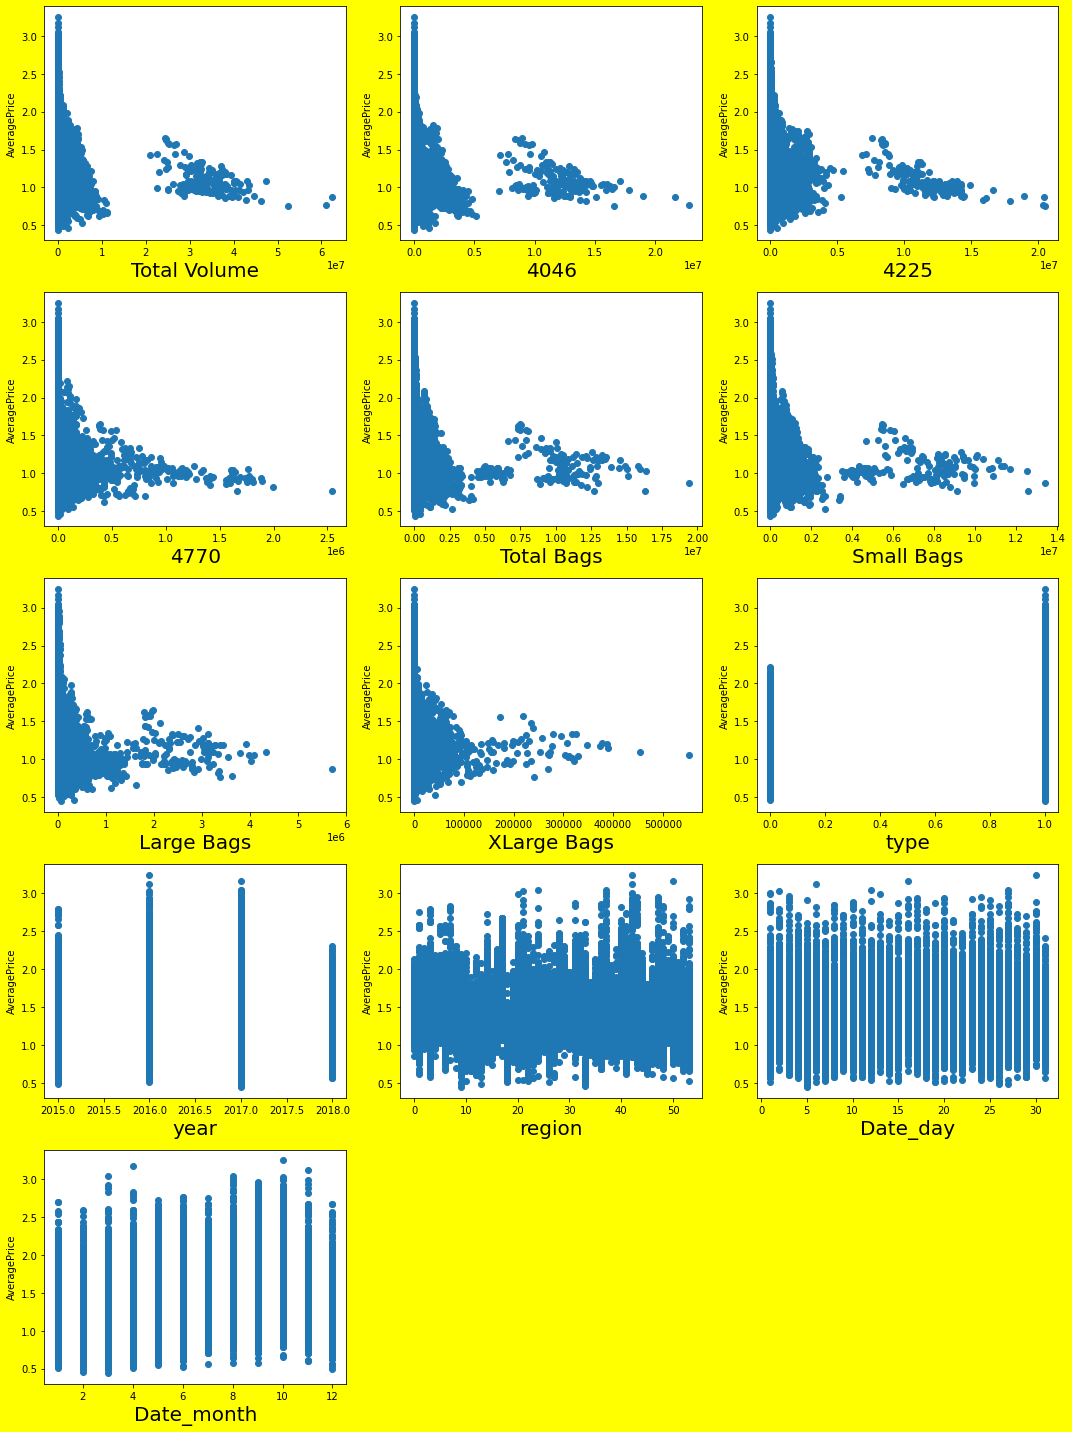

In [67]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(15,20), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('AveragePrice',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


### Observations:
    - we see that the relationship of all the columns are not uniform , we also see that there are some columns which are 
       - not showing a uniform no relationship - i.e Unamed, region,day and month as well as year 
       - showing postive relationship i.e type
       -showing negative relationship i.e Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags but the values are very less and most of the points lie within 0 to 0.1 or 0.2 approx , we need to treat this for skewness
       
    - We need to remember that these transactions are for day basis and we see almost similar pattern with the columns Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags
       

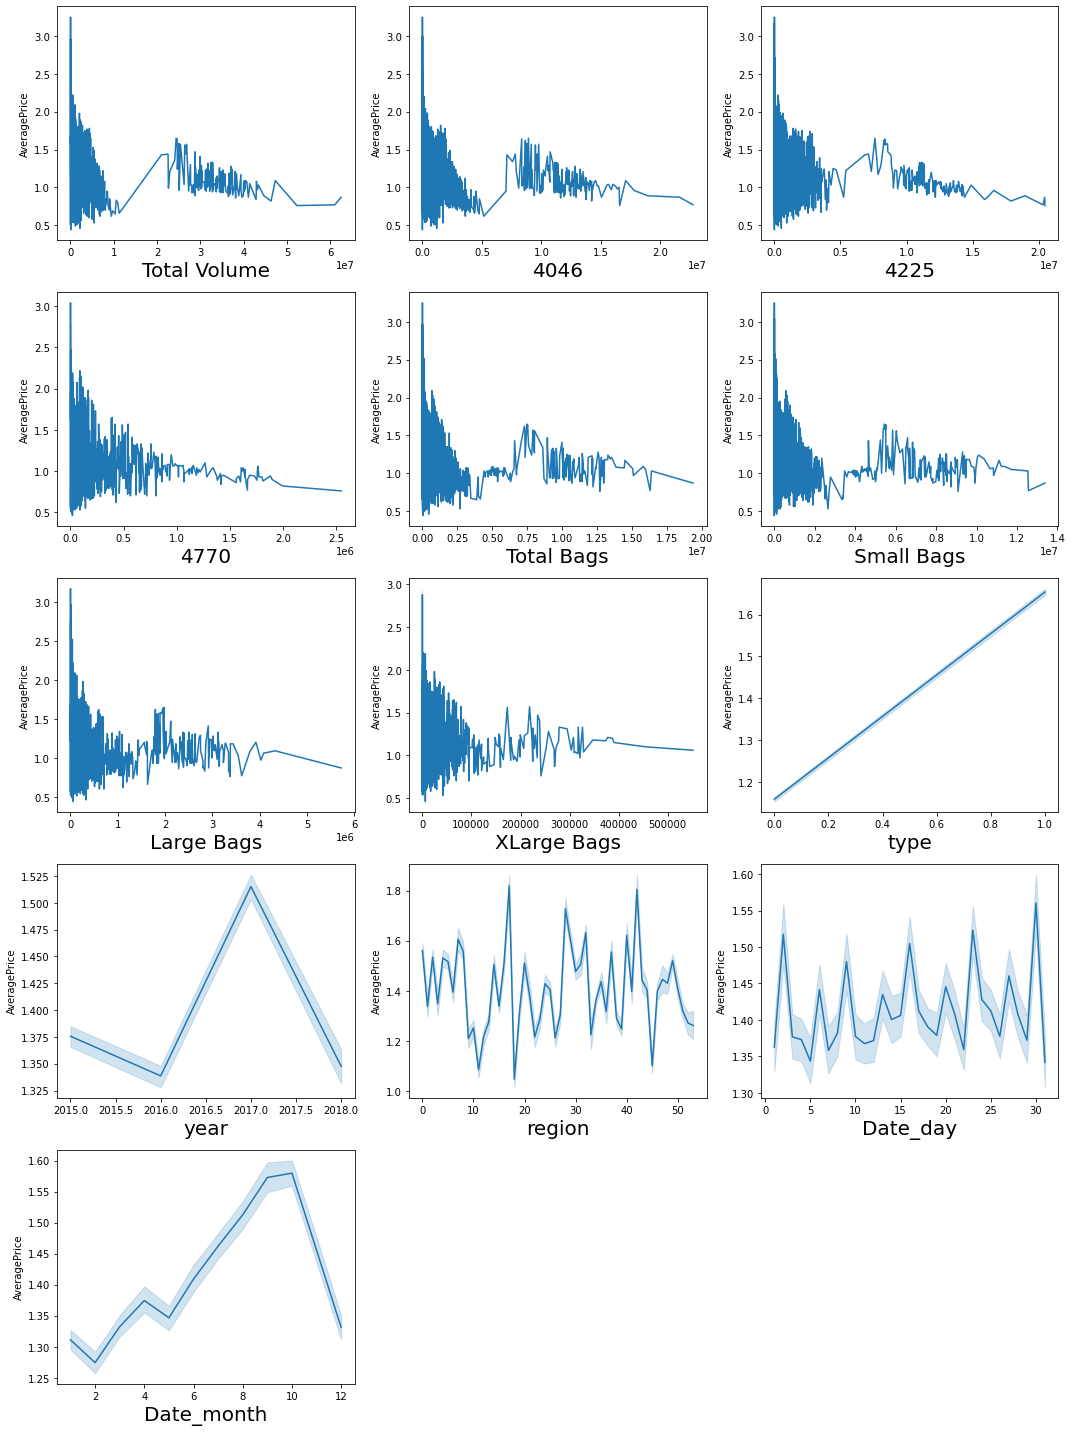

In [68]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(15,20), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.lineplot(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('AveragePrice',fontsize = 10)
    plotnumber +=1
plt.tight_layout()

Here in the line plot we also see the same kind of distribution as we see in the scatter plot which we used before and we see the same observations in this line plot as well 


### Observations form the plots:-
    - we see that the relationship of all the columns are not uniform , we also see that there are some columns which are 
       - not showing a uniform no relationship - i.e Unamed, region,day and month as well as year 
       - showing postive relationship i.e type
       -showing negative relationship i.e Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags but the values are very less and most of the points lie within 0 to 0.1 or 0.2 approx , we need to treat this for skewness
       
    - We need to remember that these transactions are for day basis and we see almost similar pattern with the columns Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags
       


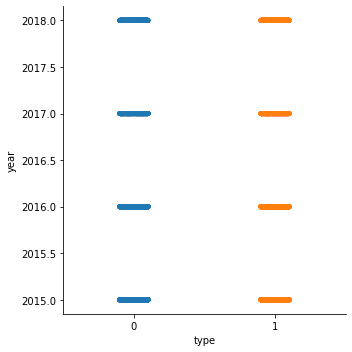

In [70]:
sns.catplot(x='type',y='year', data=df)

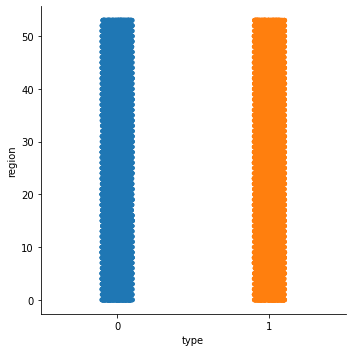

In [71]:
sns.catplot(x='type',y='region', data=df)

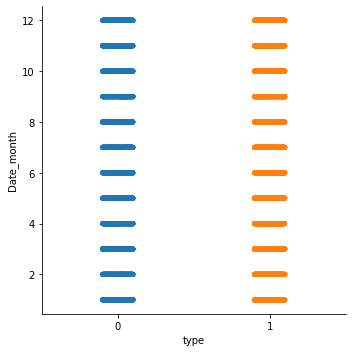

In [72]:
sns.catplot(x='type',y='Date_month', data=df)

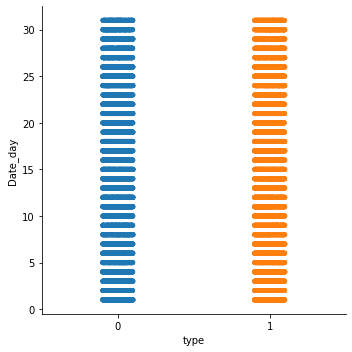

In [73]:
sns.catplot(x='type',y='Date_day', data=df)

<AxesSubplot:xlabel='region', ylabel='year'>

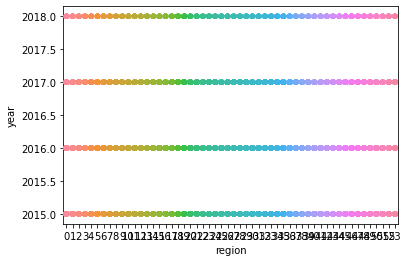

In [74]:
sns.stripplot(x='region',y='year', data=df)

<AxesSubplot:xlabel='region', ylabel='Date_month'>

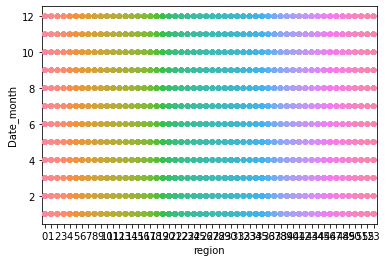

In [75]:
sns.stripplot(x='region',y='Date_month', data=df)

<AxesSubplot:xlabel='region', ylabel='Date_day'>

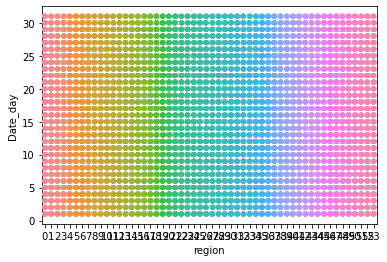

In [76]:
sns.stripplot(x='region',y='Date_day', data=df)

### Observations of categorical columns with CATplot as well as Stripplot :-
    
    We see uniform distribution as we saw in the earler analysis we see all the categories have equal transactions with the target as well as the type column

### Visualizing the relationship between the features and the 2nd target variable - Region

In [77]:
#Divide data into features and label

x = df.drop(columns = ['region'])
y = df['region']

In [78]:
x

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  Date_day  Date_month  
0         8603.62       93.25          0.0     0  2015        27          12  
1         9408.07       97.49          0.0     0  2015        20          12  
2         8042.21      103.14          0.0     0  2015        13          12  
3         5677.40      133.76          0.0     0  2015         6          12  
4         5986.26      197.69          0.0     0  2015        29          11  
...           ...         ...          ...   ...   ...       ...         ...  
18244    13066.82      431.85          0.0     1  2018         4           2  
18245     8940.04      324.80          0.0     1  2018        28           1  
18246     9351.80       42.31          0.0     1  2018        21           1  
18247    10919.54       50.00          0.0     1  2018        14           1  
18248    11988.14       26.01          0.0     1  2018         7           1  

[18249 rows x 13 columns]

In [79]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

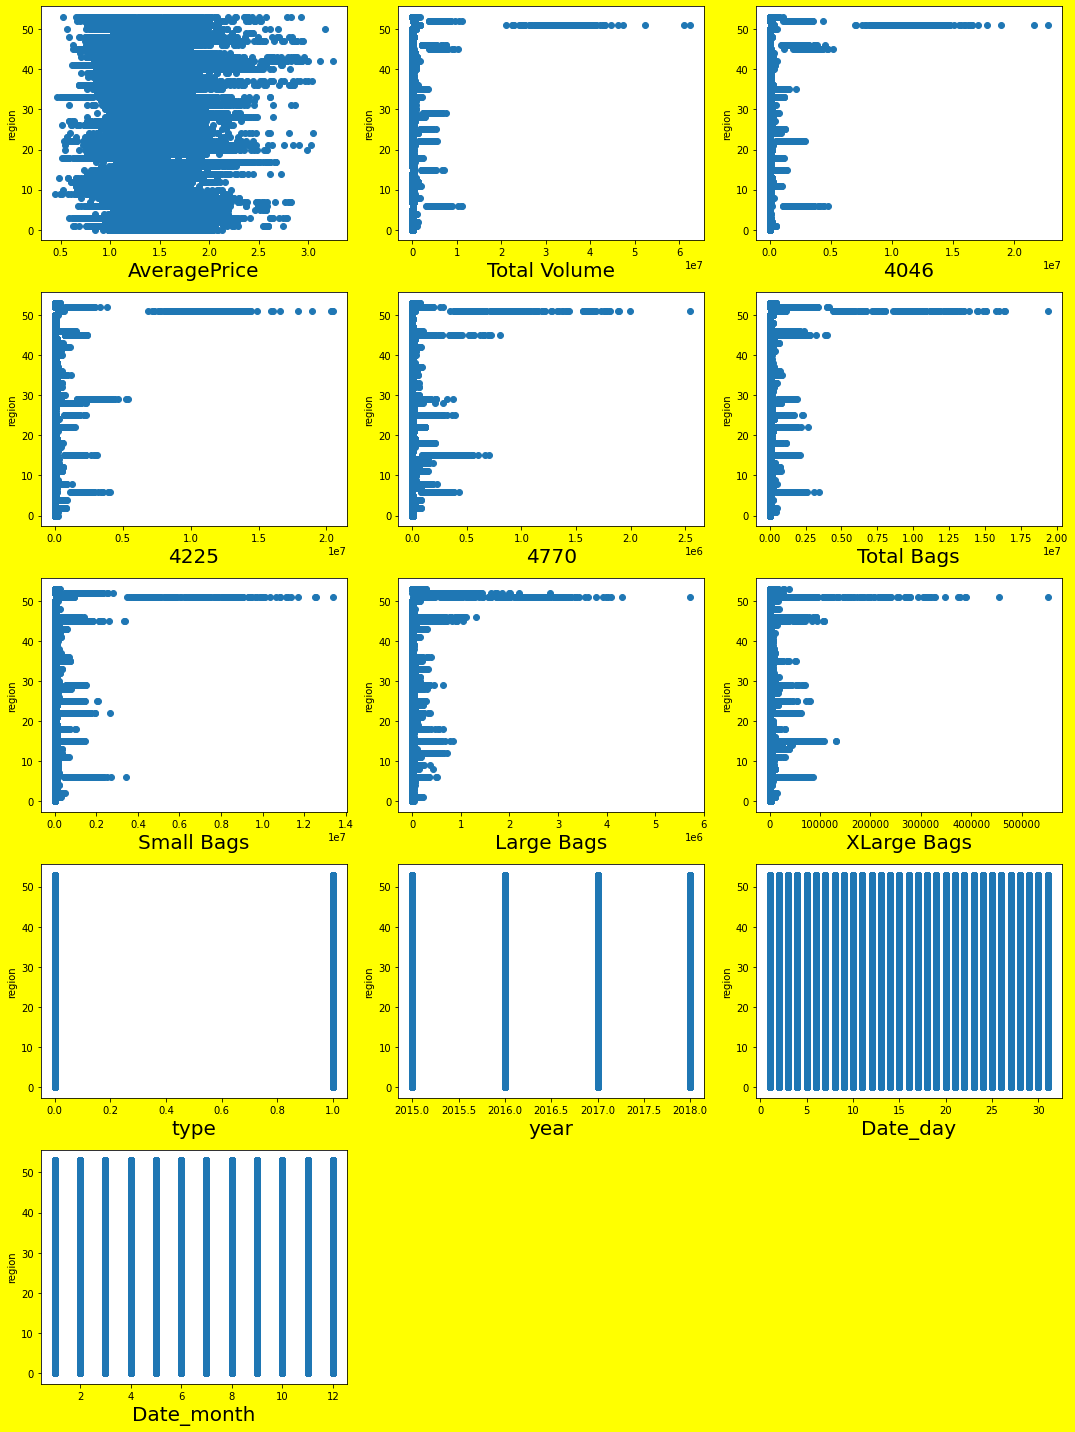

In [80]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(15,20), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('region',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


### Observations:-
    - we see that the relationship of all the columns are not uniform , we also see that there are some columns which are 
       - not showing a uniform no relationship - i.e Unamed, AveragePrice ,day,type and month as well as year 
       -showing positive relationship i.e Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags but the values are very less and most of the points lie within 0 to 0.1 or 0.2 approx , we need to treat this for skewness
       
    - We need to remember that these transactions are for day basis and we see almost similar pattern with the columns Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags
       

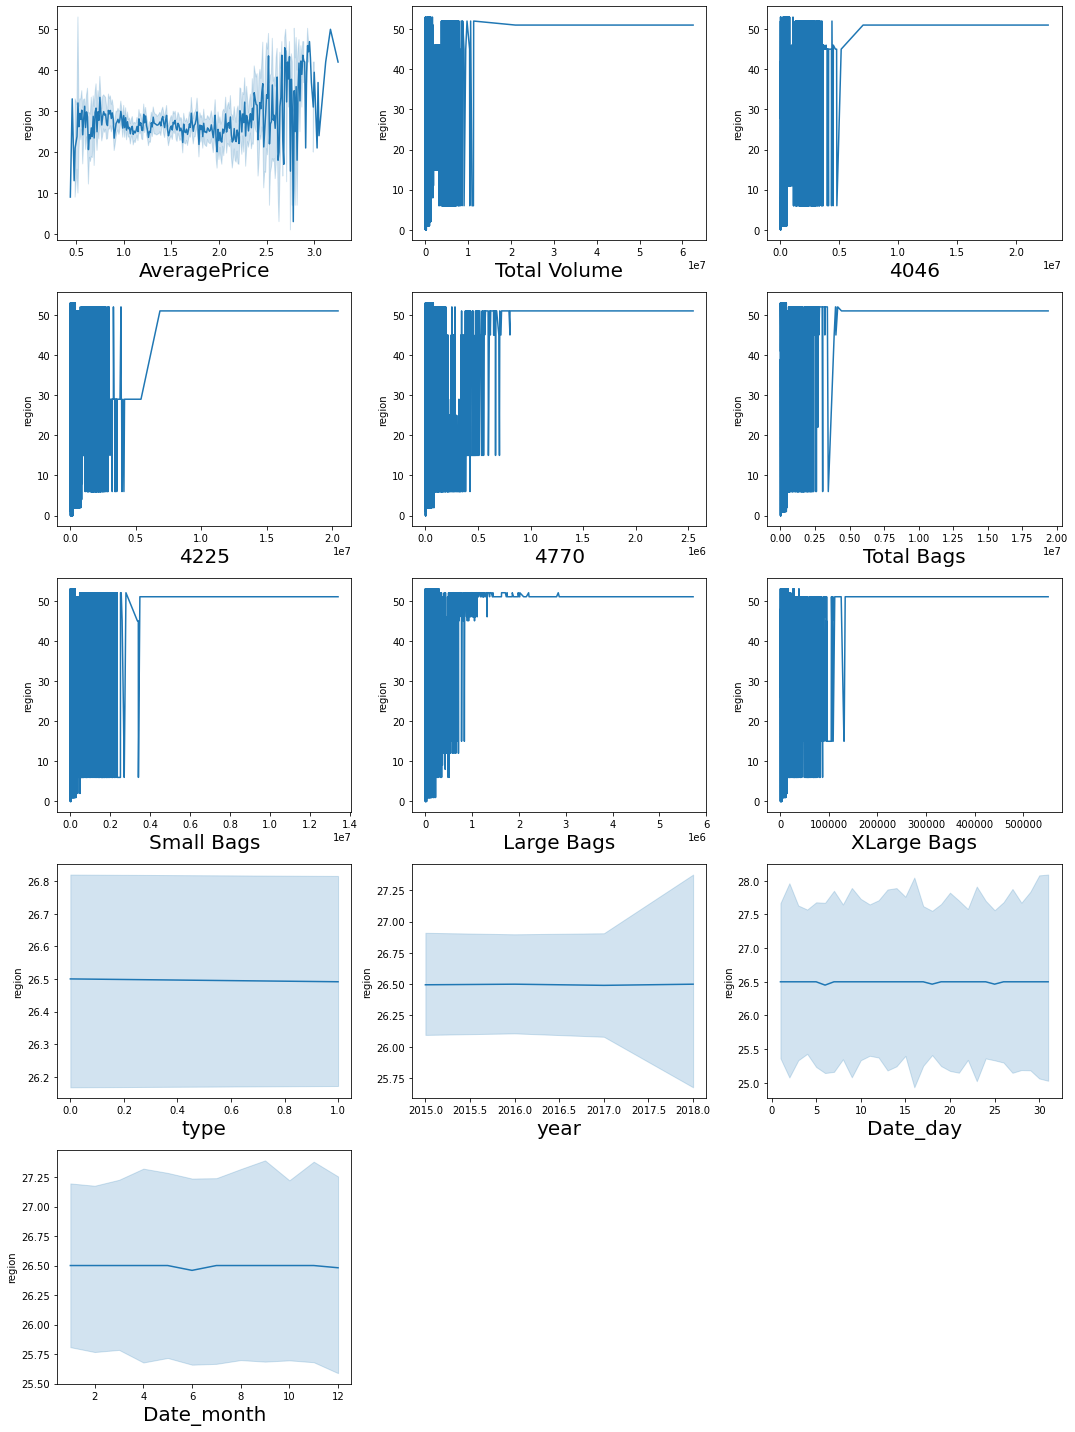

In [81]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(15,20), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.lineplot(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('region',fontsize = 10)
    plotnumber +=1
plt.tight_layout()

Here in the line plot we also see the same kind of distribution as we see in the scatter plot which we used before and we see the same observations in this line plot as well 

# EDA

### Describing the Dataset

In [83]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          type  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      0.499918   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.500014   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000      0.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000      0.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000      1.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000      1.000000   

               year        region      Date_day    Date_month  
count  18249.000000  18249.000000  18249.000000  18249.000000  
mean    2016.147899     26.495644     15.662612      6.177215  
std        0.939938     15.583788      8.776281      3.534130  
min     2015.000000      0.000000      1.000000      1.000000  
25%     2015.000000     13.000000      8.000000      3.000000  
50%     2016.000000     26.000000     16.000000      6.000000  
75%     2017.000000     40.000000     23.000000      9.000000  
max     2018.000000     53.000000     31.000000     12.000000

### Observations:-

- We see that the column Unamed has high variance of ouliers where it is having min 0 and high of 52 and the mean is 4.22 approx , we cannot have this mch skewness in the data so we may have to remove  

- we see that the columns Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags have high variance and very high mean values and the max values which is too much skewness in the data we need to treat it 

- We see that the columns: '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags have 0 values and a significant amount of it which we need to remove as well

- the rest of the columns do not show any signs of having extreme values or skewness as off now lets us plot it to study further especially the target variables and the 2nd one Region is categorical in nature so we cannot say it has 

- Lets us plot the data we have plotted now 

### Visualization of the Data Properties


<AxesSubplot:>

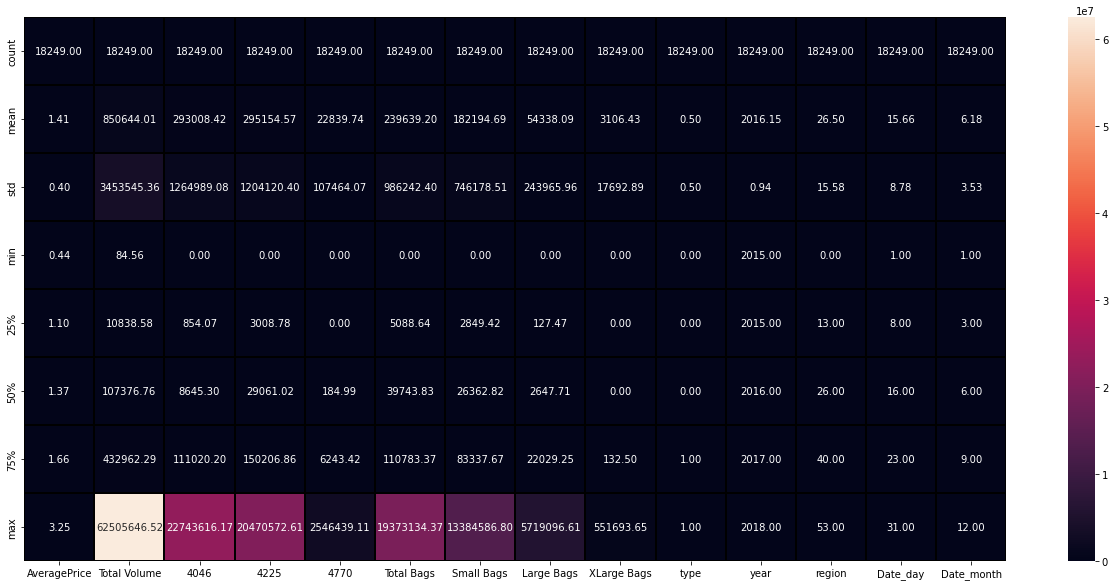

In [84]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

### We see that the columns Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags all have absurdly extreme outliers on the higher side  

Data is not scaled so we have some extreme values in Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags so we need to treat them by standardization and tranformation Techniques 

In [85]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Date_day         0.014310
Date_month       0.106617
dtype: float64

In [86]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

skew=('Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags')

for col in skew:
    if df.skew().loc[col]> 0.55:
        df[col] = np.log1p(df[col])

In [87]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
Date_day        0.014310
Date_month      0.106617
dtype: float64

# we are first calculating the skew value and some of the column skew value are far from zero almost 13 so its diificult to make a good model with this.

- The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero
- In the last cell I am again checking the skewness value and there is difference between the first skewness value and second, now the skewness value of each column is near to zero.

- Making the skewness value near to zero will help to get better score.

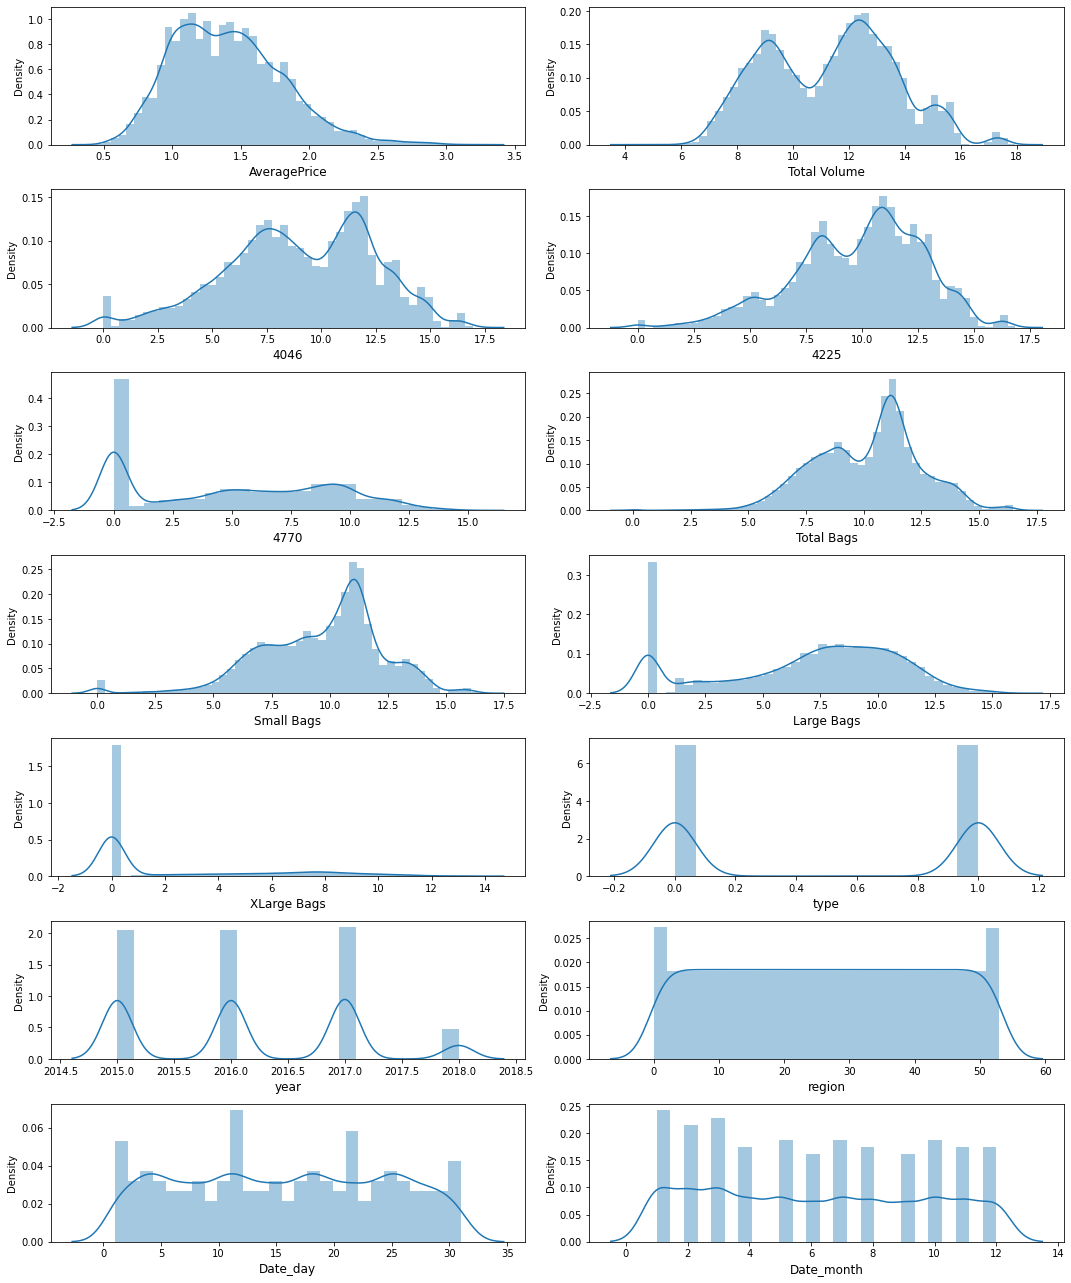

In [88]:
#Lets see how the data is distributed for every column after the treatment

plt.figure(figsize =(15,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=15:
        ax = plt.subplot(8,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

We see that we finally have some really better distplot especially with the highly skewed data

# Correlation of the columns with the 1st target variable -AveragePrice

In [89]:
df.corr()['AveragePrice'].sort_values()

Total Volume   -0.583411
Total Bags     -0.574931
4046           -0.543861
4770           -0.507234
Small Bags     -0.493520
Large Bags     -0.478741
4225           -0.446584
XLarge Bags    -0.379680
region         -0.011716
Date_day        0.027386
year            0.093197
Date_month      0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [90]:
df

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0              1.33     11.070344  6.944801  10.905146  3.895080    9.070833   
1              1.35     10.912867  6.515127  10.706381  4.083115    9.159737   
2              0.93     11.680313  6.679222  11.600485  4.879007    9.005325   
3              1.08     11.277116  7.032624  11.184108  4.298373    8.667708   
4              1.28     10.840377  6.848515  10.688288  4.340944    8.729874   
...             ...           ...       ...        ...       ...         ...   
18244          1.63      9.745419  7.624599   7.333154  0.000000    9.510421   
18245          1.71      9.538855  7.083975   8.141044  0.000000    9.134090   
18246          1.87      9.530085  7.084159   7.805389  6.591591    9.147945   
18247          1.93      9.693150  7.332127   8.000363  6.590315    9.302969   
18248          1.62      9.769418  7.971006   7.765200  5.418453    9.393924   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Date_day  \
0        9.060055    4.545951          0.0     0  2015       0        27   
1        9.149429    4.589955          0.0     0  2015       0        20   
2        8.992584    4.645736          0.0     0  2015       0        13   
3        8.644425    4.903495          0.0     0  2015       0         6   
4        8.697389    5.291746          0.0     0  2015       0        29   
...           ...         ...          ...   ...   ...     ...       ...   
18244    9.477908    6.070391          0.0     1  2018      53         4   
18245    9.098407    5.786284          0.0     1  2018      53        28   
18246    9.143431    3.768384          0.0     1  2018      53        21   
18247    9.298401    3.931826          0.0     1  2018      53        14   
18248    9.391757    3.296207          0.0     1  2018      53         7   

       Date_month  
0              12  
1              12  
2              12  
3              12  
4              11  
...           ...  
18244           2  
18245           1  
18246           1  
18247           1  
18248           1  

[18249 rows x 14 columns]

### We see that type has the highest correlation with the target variable having a score of 0.61 which is the highest and 4046, Total Volume,Total bags,Smallbags as well as 4770 have the lowest correlation with the target variable , 

Overall the rest of the columns show very less correaltion or no correlation , but keeping in mind the size of the dataset

And we see that Unnamed column is having nomrelation with the target as well so we can safely remove it , once we check for 2nd target variable as well

# Correlation of the columns with the 2nd target variable -region

In [91]:
df.corr()['region'].sort_values()

AveragePrice   -0.011716
type           -0.000280
Date_month     -0.000144
year           -0.000055
Date_day       -0.000021
XLarge Bags     0.016701
4770            0.071842
4225            0.072366
Small Bags      0.078192
Total Bags      0.105552
Total Volume    0.111673
Large Bags      0.113016
4046            0.191000
region          1.000000
Name: region, dtype: float64

Here also we see that there is not much correlation with any of the variable with respect to the target variable , max being 19% which is pretty insignificant .

We also see that the Unamed column again has no relation with the target as well so we will safely remove it 

In [93]:
df.shape

(18249, 14)

In [94]:
df.head()

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          1.33     11.070344  6.944801  10.905146  3.895080    9.070833   
1          1.35     10.912867  6.515127  10.706381  4.083115    9.159737   
2          0.93     11.680313  6.679222  11.600485  4.879007    9.005325   
3          1.08     11.277116  7.032624  11.184108  4.298373    8.667708   
4          1.28     10.840377  6.848515  10.688288  4.340944    8.729874   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Date_day  \
0    9.060055    4.545951          0.0     0  2015       0        27   
1    9.149429    4.589955          0.0     0  2015       0        20   
2    8.992584    4.645736          0.0     0  2015       0        13   
3    8.644425    4.903495          0.0     0  2015       0         6   
4    8.697389    5.291746          0.0     0  2015       0        29   

   Date_month  
0          12  
1          12  
2          12  
3          12  
4          11

We have removed the column Unamed now to check or Multicollinearity Problem within features

## Heatmap of Correlation of the columns within the Columns or Features and Target

<AxesSubplot:>

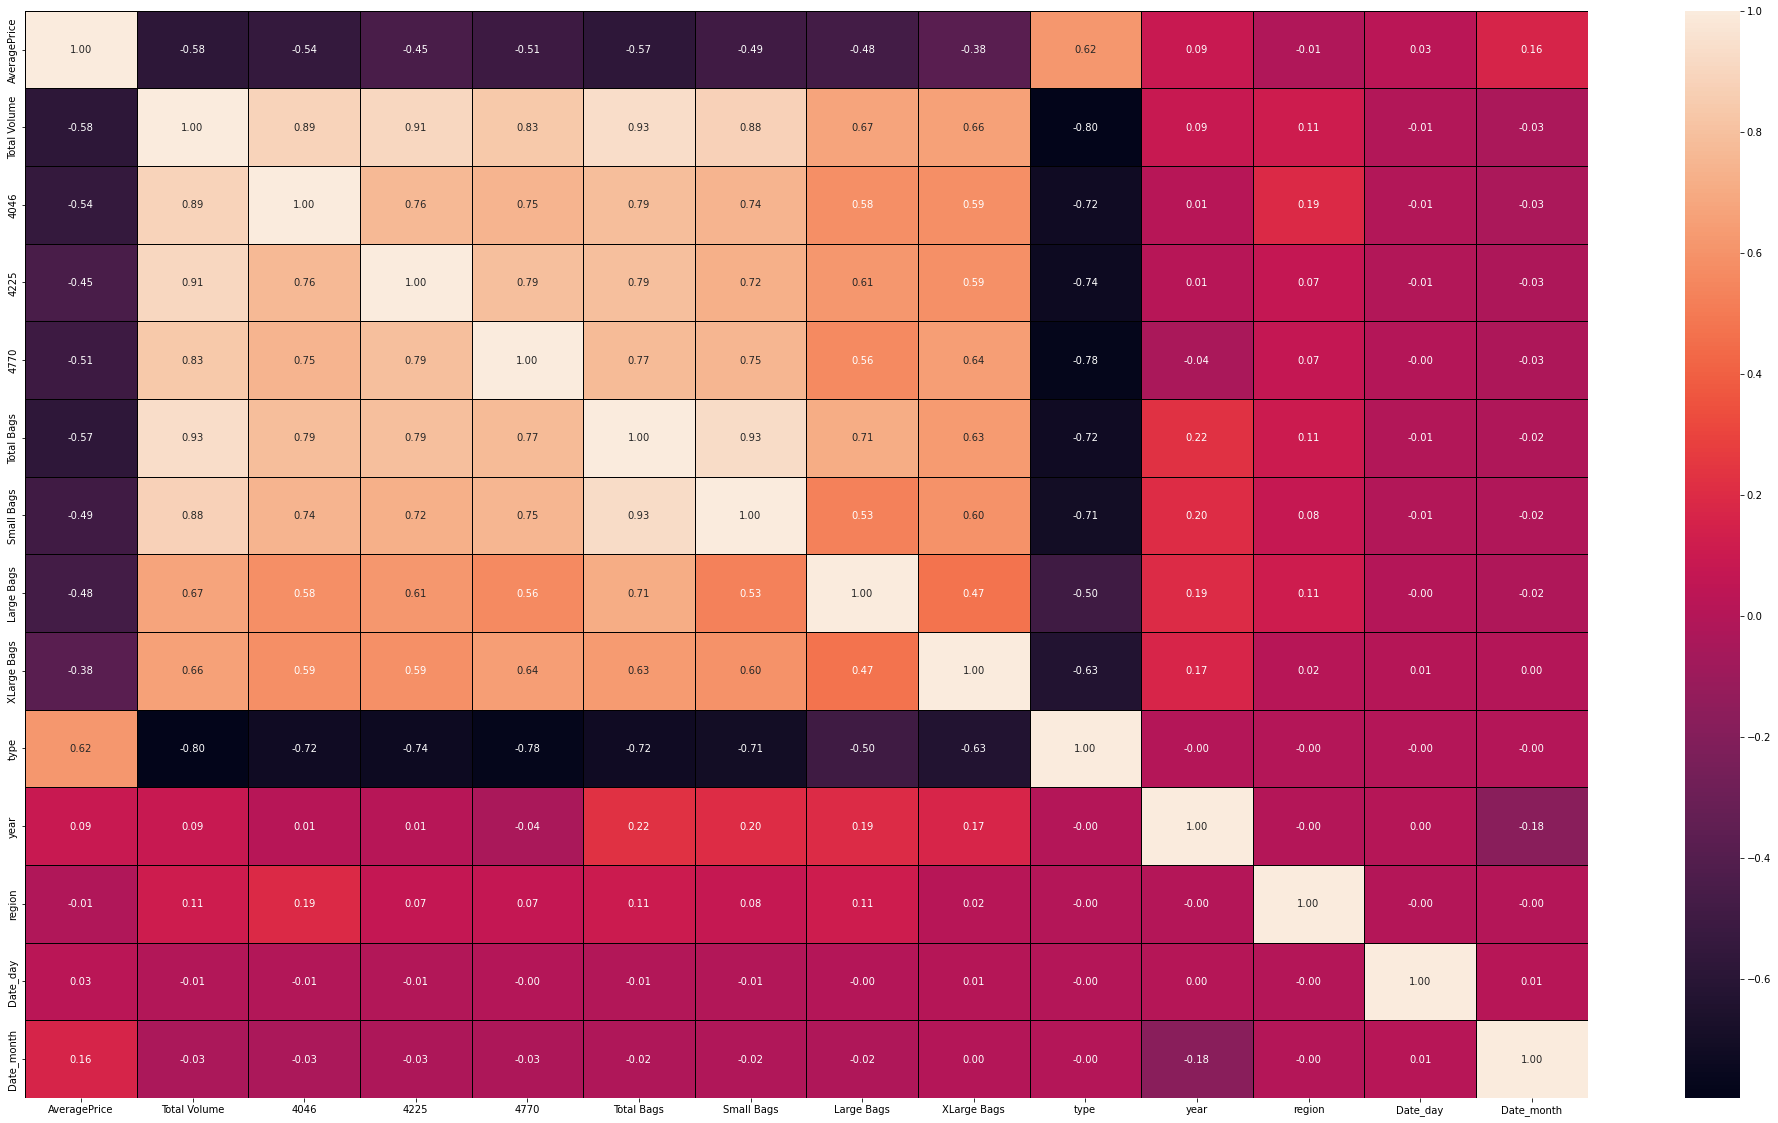

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

### Observations from the heatmap

- we see that there is 60-100% approx multicollinearity  as in relationshoip btw the columns :-
        -'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags'
  - Some features are having more than 90% correaltion , as we have seen in the graph before the pattern is the same so we can safely remove and keep only one as it will lead to overfitting
  - features like XLarge bags have less correaltion approx 60-80 with some columns but the others are having higher correalation with the others so we cant consider this column as well and we ill remove them
  
- This means it will lead to over fitting , so we must eliminate 7 of these columns and only keep one as it represents the rest of the 8, In this case we will keep XLarge Bags as its the highest among the rest in terms of correlation and eliminate the rest to avoid issue with overfitting

- We see that there is approx 62% correlation between type and AveragePrice  whichis also pretty high so will keep this as it contributes the highest to the target varaiable


- Therefore we will now move to remove these columns after careful observations 

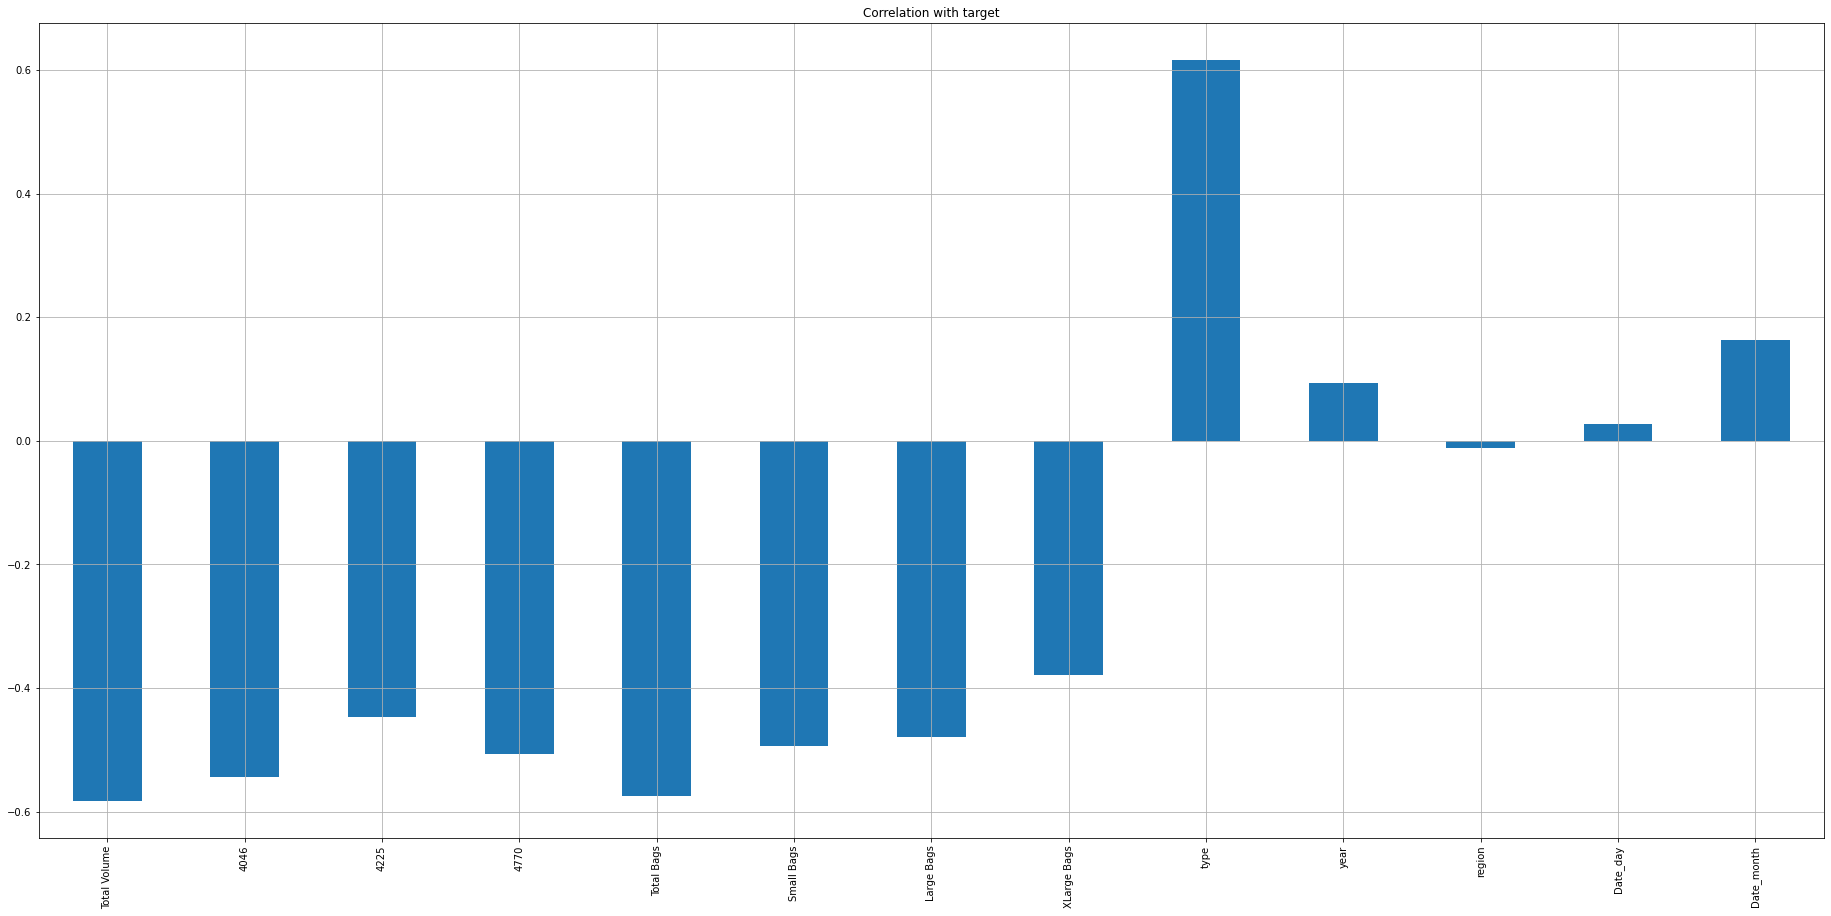

In [96]:
# Plotting a barplot to see th relationship with 1st label in a better way

df.drop('AveragePrice', axis=1).corrwith(df.AveragePrice).plot(kind='bar', grid=True,figsize=(32,15),
                                                  title='Correlation with target')

plt.show()

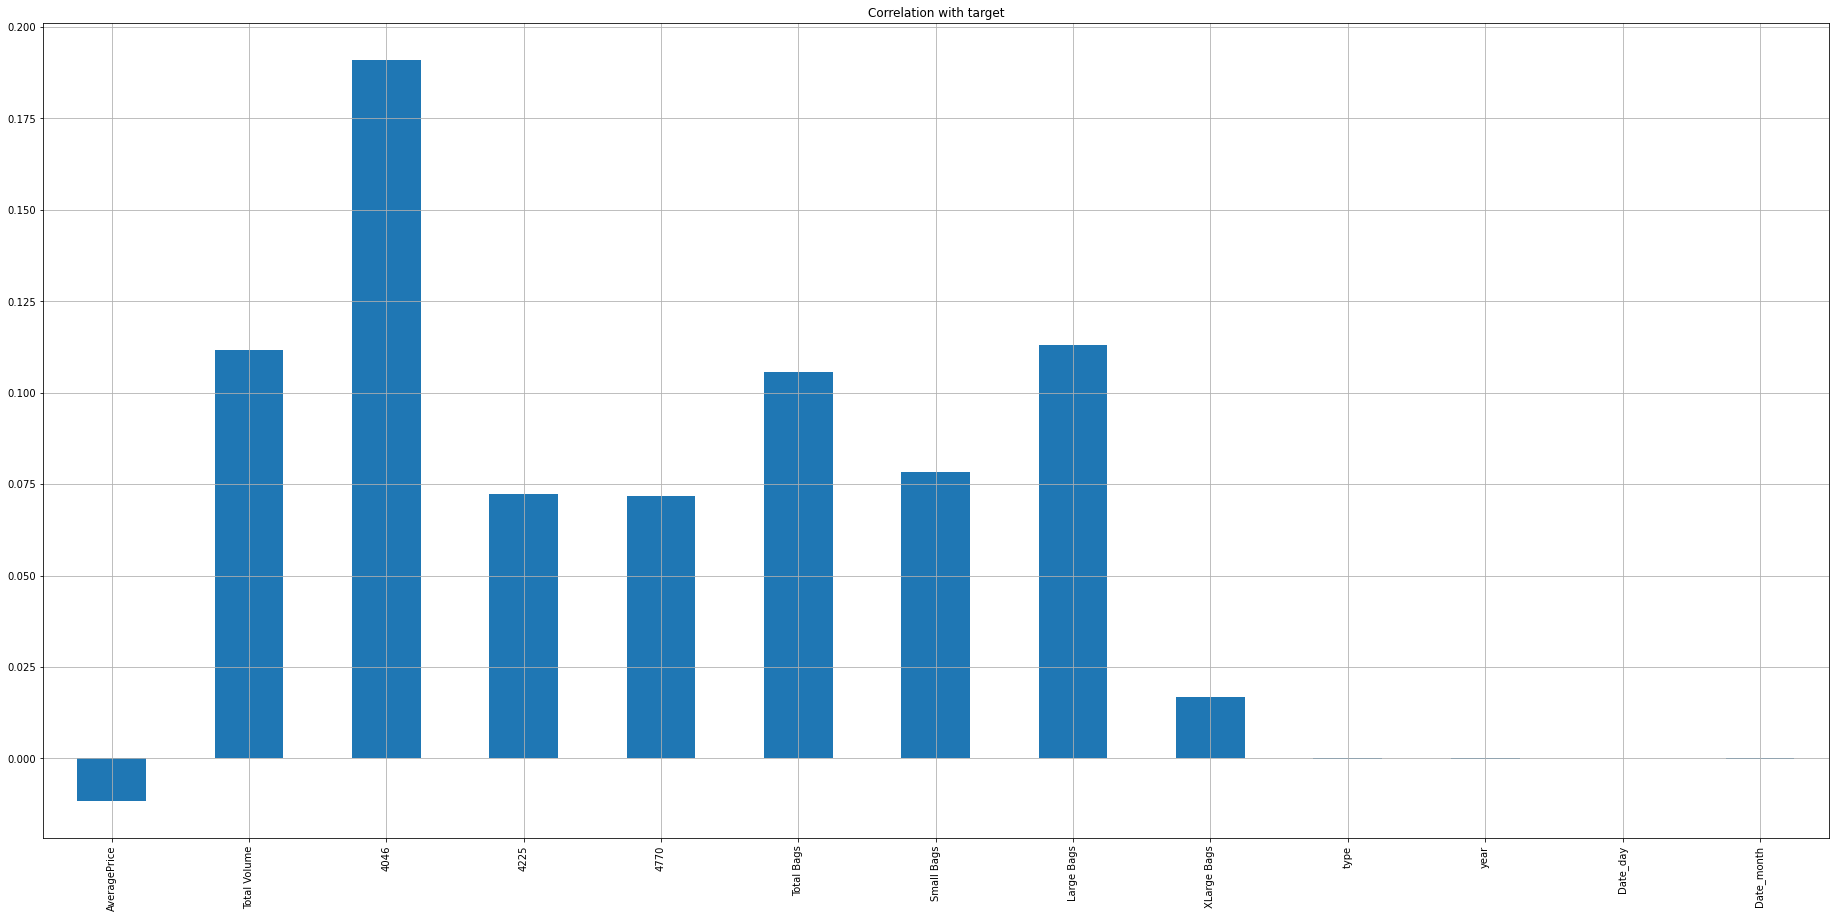

In [97]:
# Plotting a barplot to see th relationship with 1st label in a better way

df.drop('region', axis=1).corrwith(df.region).plot(kind='bar', grid=True,figsize=(32,15),
                                                  title='Correlation with target')

plt.show()

IN this bar graph we see that apart from the '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'Total Volume' and XLarge bags none of the other columns show any signs of having a relation with the label which can affect the model for it 

# Dropping the features which arehighly correlated to avoid Multicollinearity problem

In [98]:
df.drop(columns = ['4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'Total Volume'],axis=1, inplace=True)

In [99]:
df.shape

(18249, 7)

<AxesSubplot:>

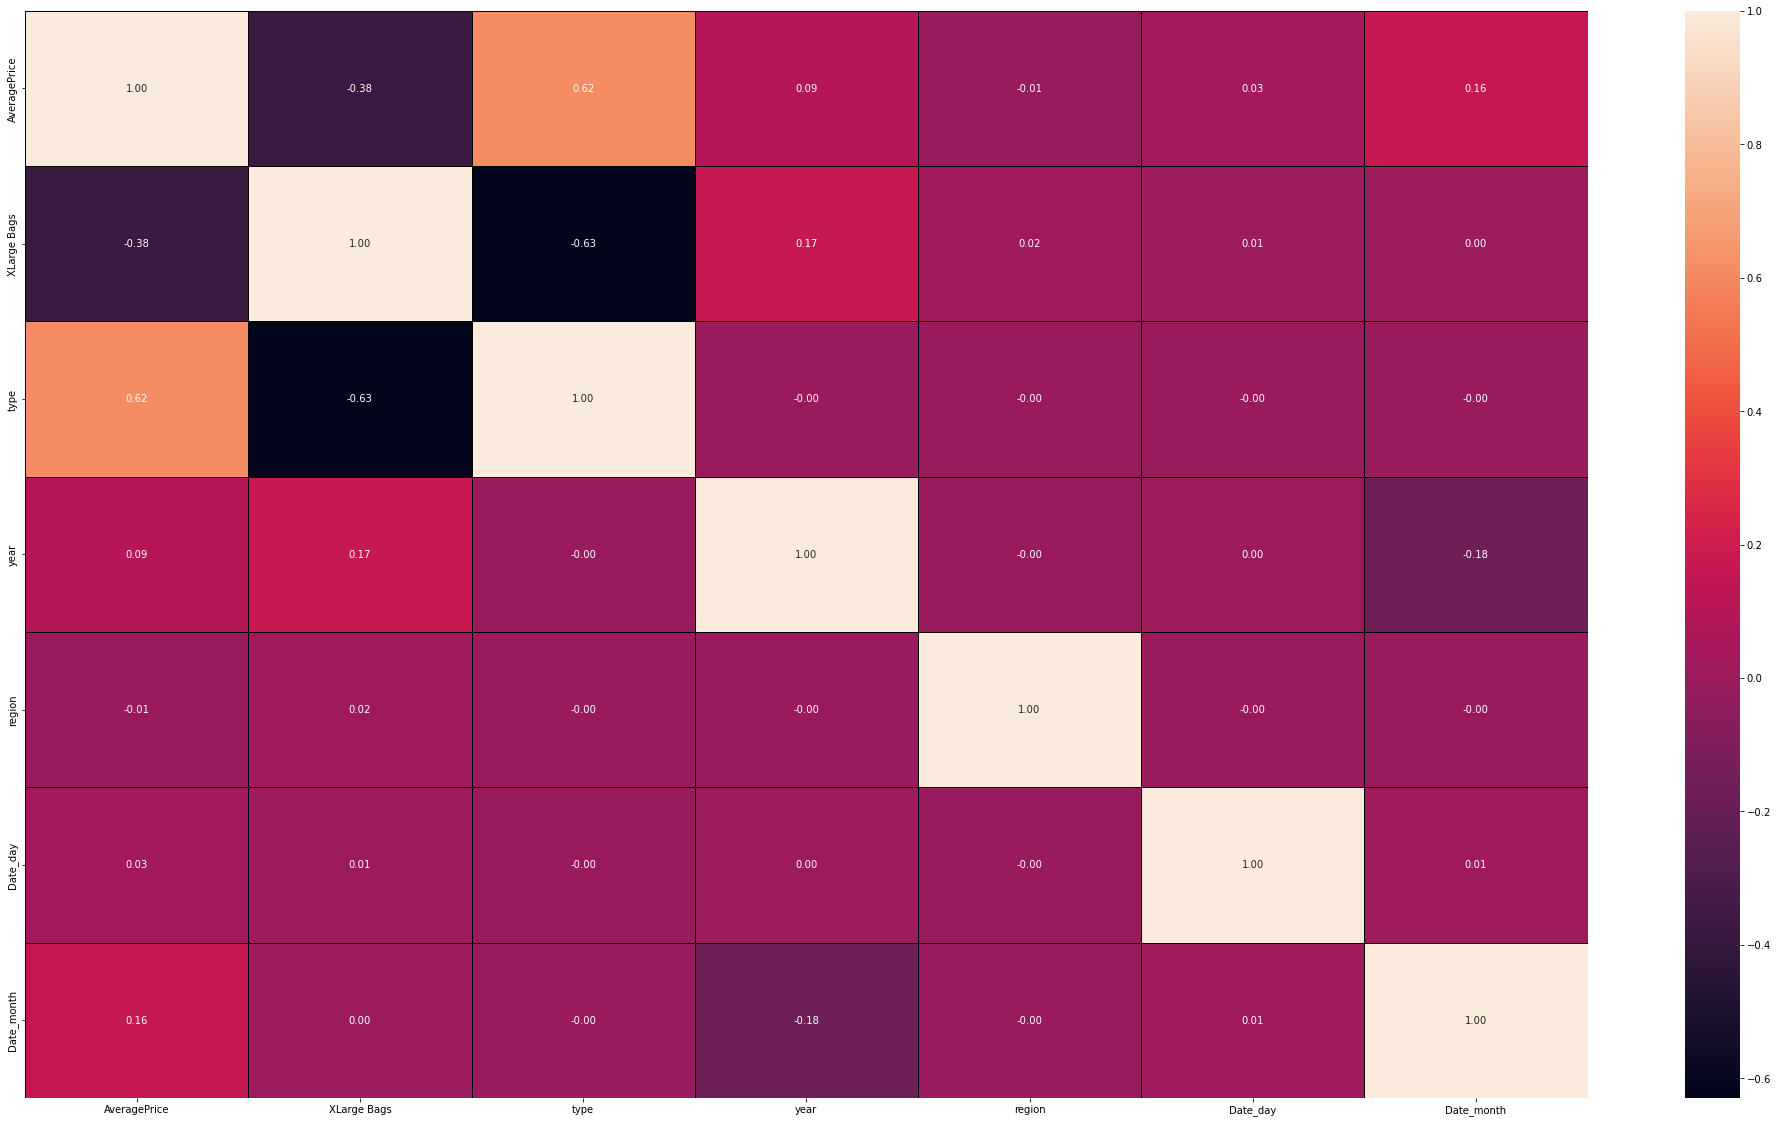

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

## We have removed the features overfitting the model and the heatmap looks a lot better now 

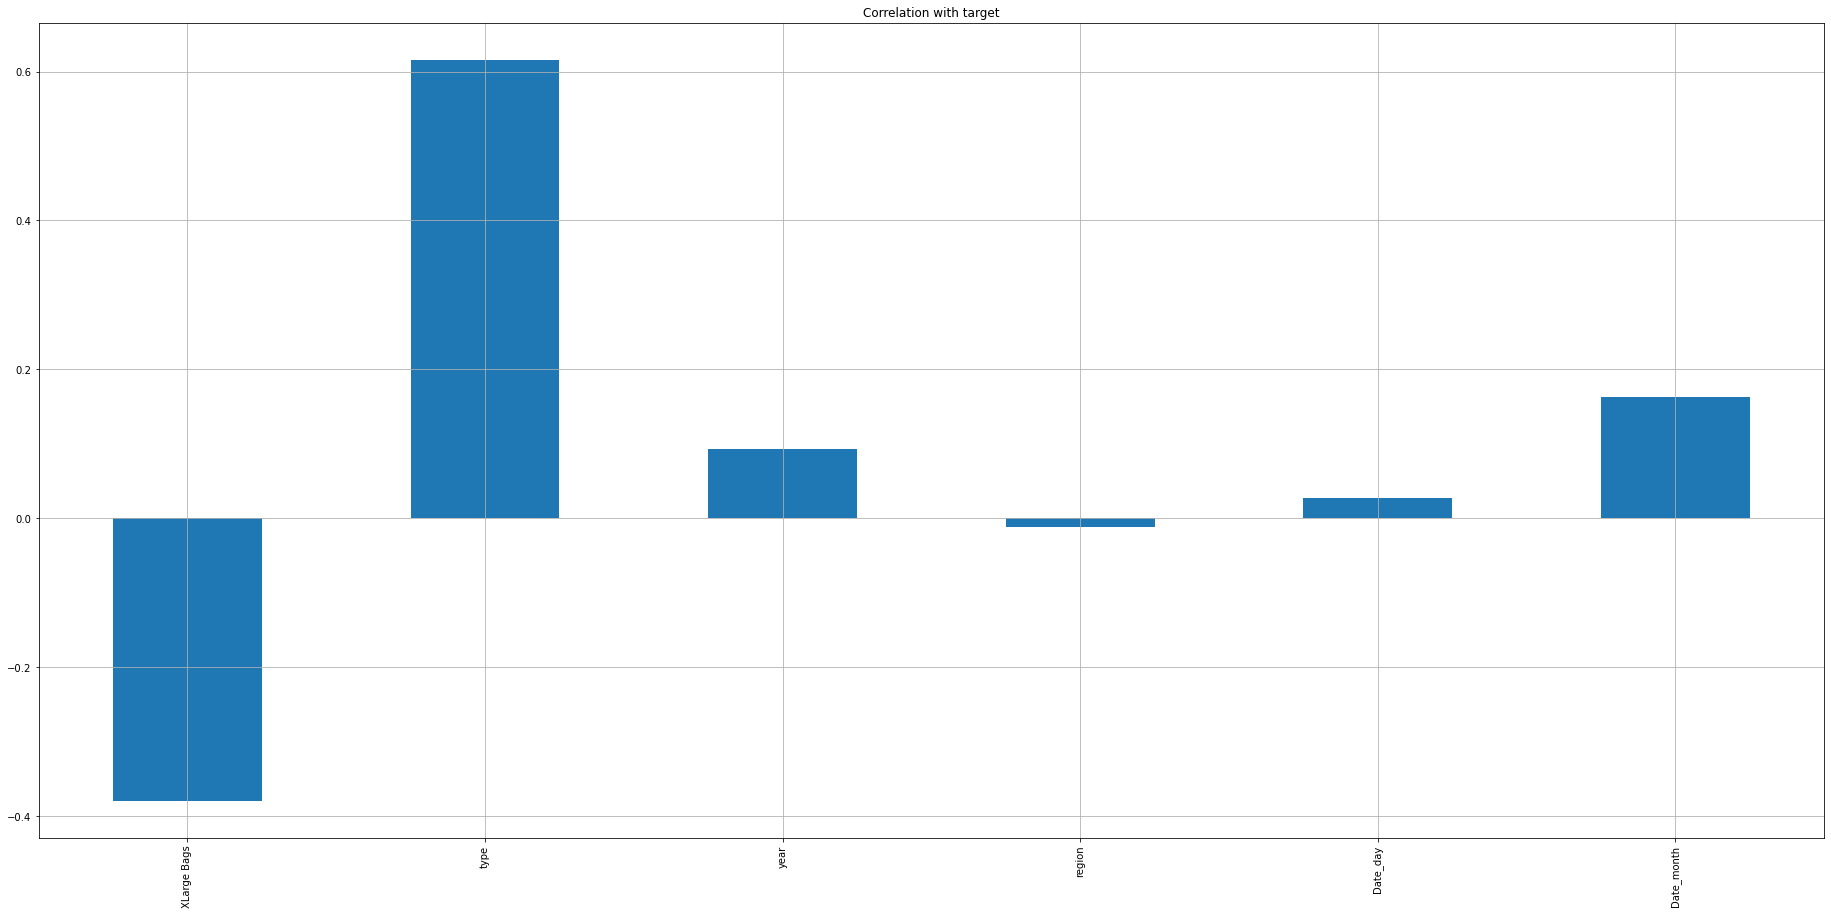

In [101]:
# Plotting a barplot to see th relationship with label in a better way

df.drop('AveragePrice', axis=1).corrwith(df.AveragePrice).plot(kind='bar', grid=True,figsize=(32,15),
                                                  title='Correlation with target')

plt.show()

# Checking for Outliers

In [102]:
# we need to check for skewness of data
df.skew().sort_values()

region          0.000030
type            0.000329
Date_day        0.014310
Date_month      0.106617
year            0.215339
AveragePrice    0.580303
XLarge Bags     1.176494
dtype: float64

### We see that the data looks really good after we have treated the data with log1p method we have done away with high skewnwss , but we do see some skewness in XLarge Bags column, The lowest and closest to 0 is region which is another label 

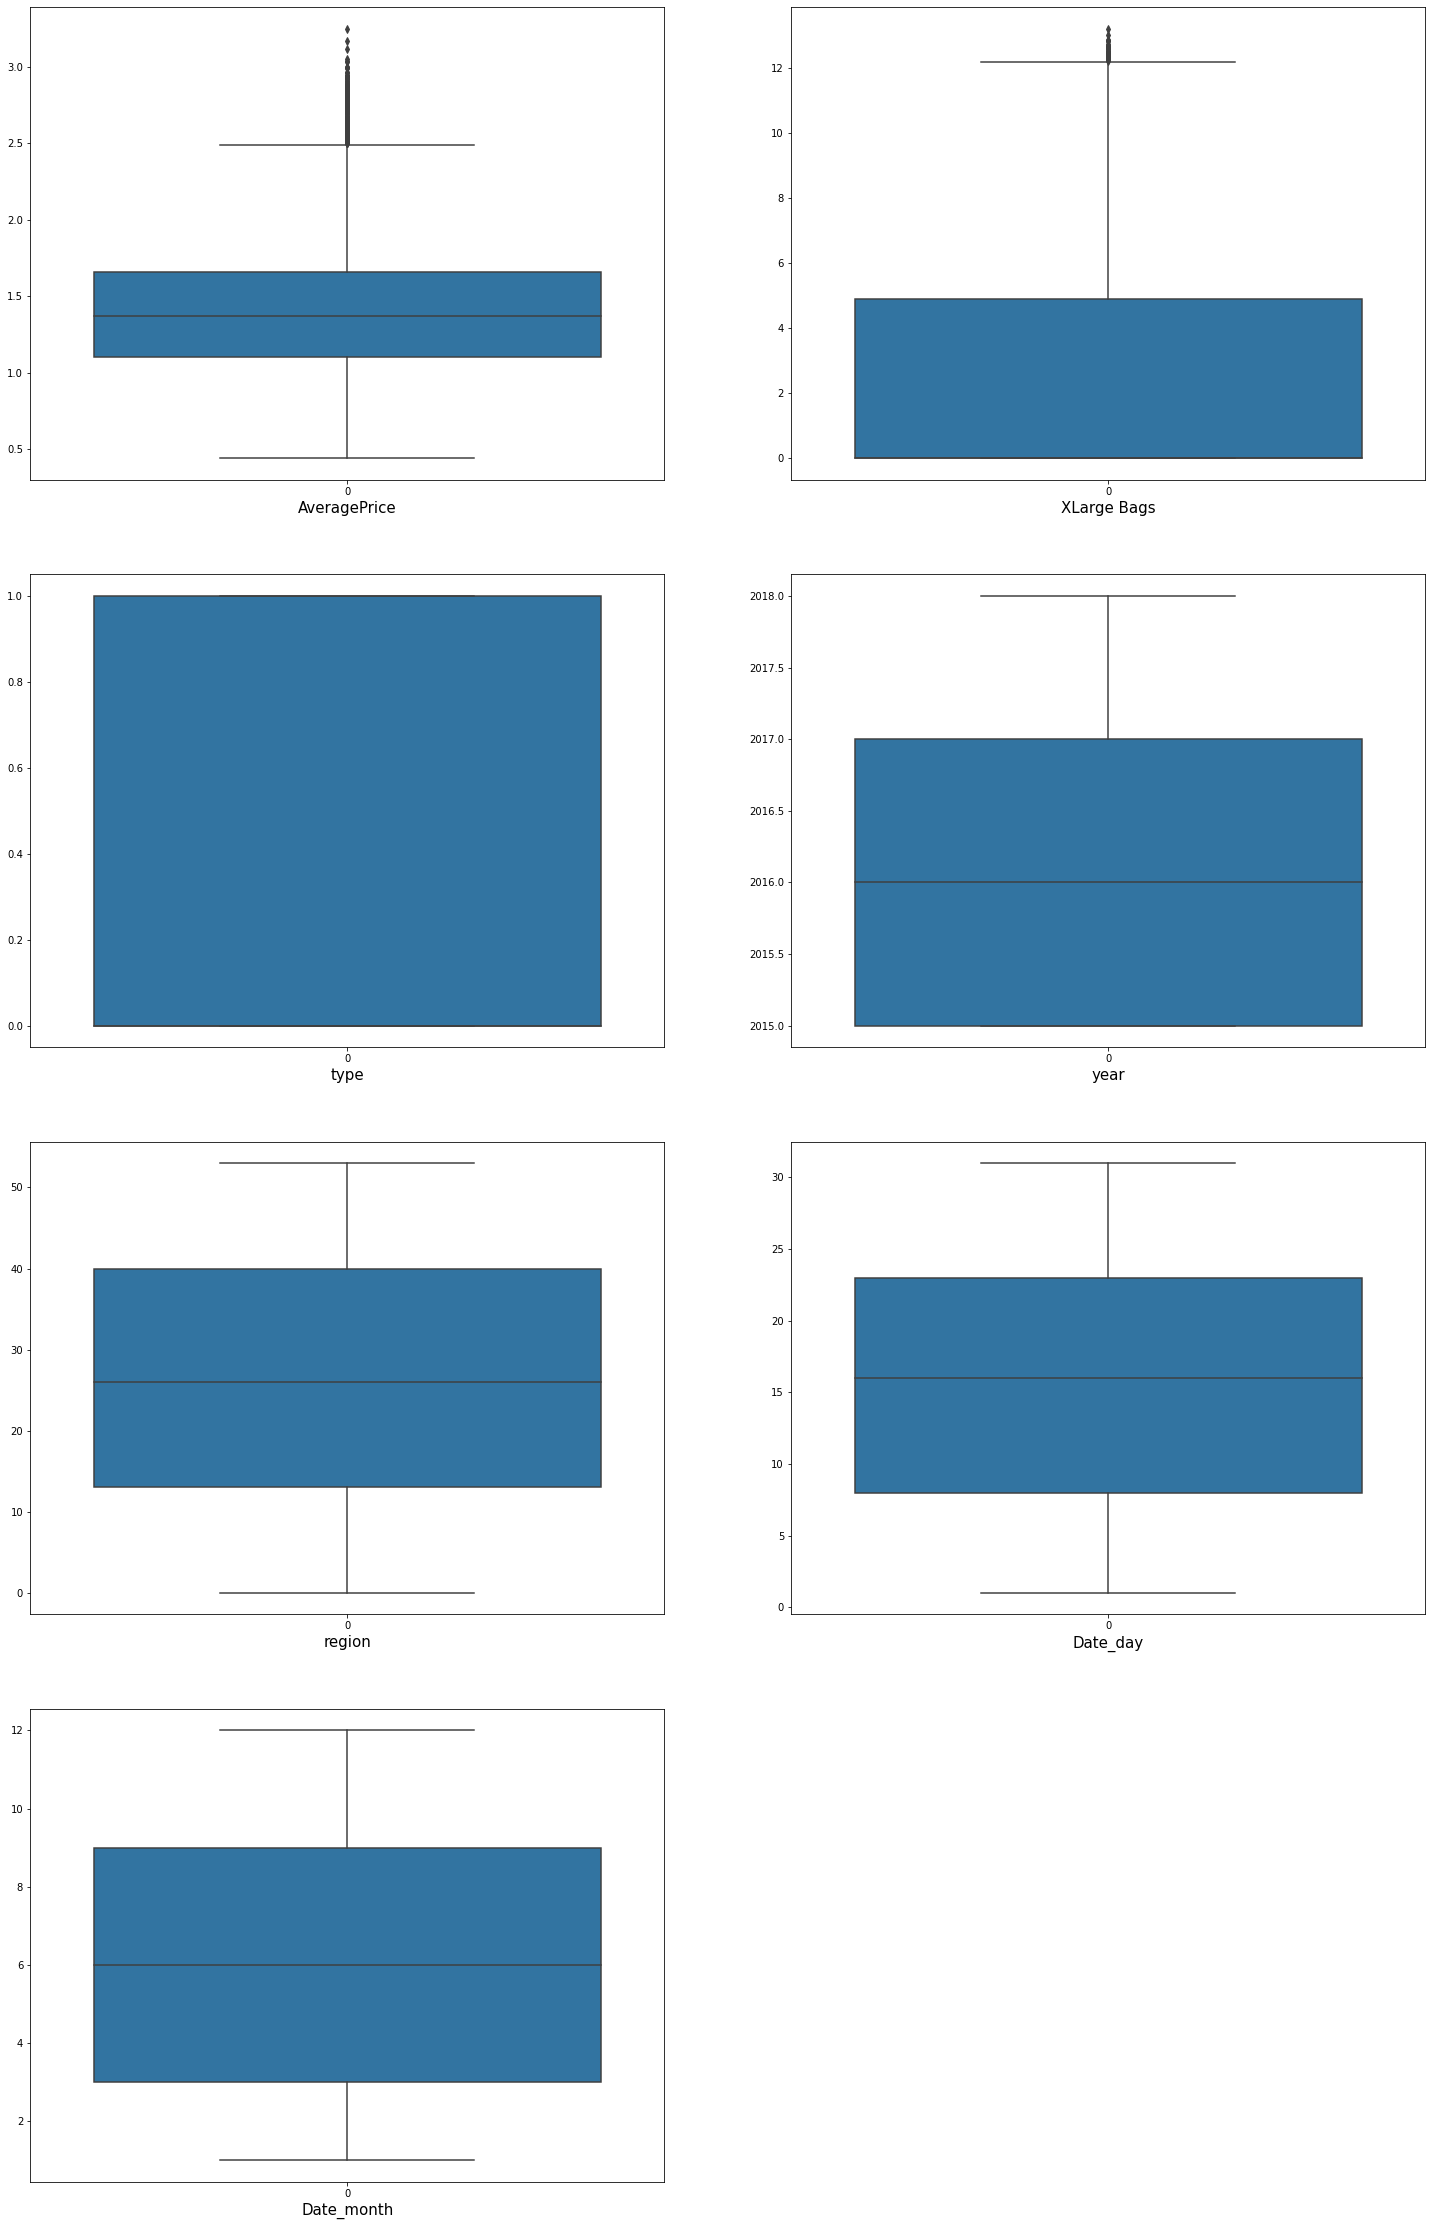

In [103]:
#Lets visualize the data
plt.figure(figsize =(25,40))
graph = 1

for column in df:
    if graph <=7: # as there are 9 columns in data
        plt.subplot(4,2,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

We see that the most outliers is in XLarrge Bags column and on the higher side  and there are few ouliers approx in columns - AveragePrice but we will not treat for the 1st phase of our regression model , So we need to treat them when we build the classification model

<AxesSubplot:>

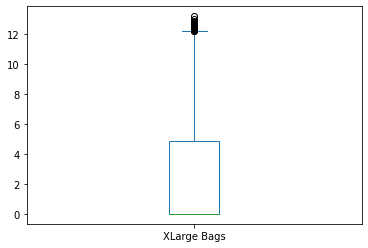

In [104]:
#As we are not able to see clearly unlesss we zoom , checking individualy

df['XLarge Bags'].plot.box()

## Treating the outliers in Columns with IQR method

In [105]:
#Find the Inter Quantile Range to identify outliers

#ist quantile
q1 = df.quantile(0.25)

#3rd quantile
q3 = df.quantile(0.75)

#IQR
iqr = q3 - q1

In [106]:

XLarge_Bags_high = (q3['XLarge Bags'] + (1.5 * iqr['XLarge Bags']))
print (XLarge_Bags_high)

index = np.where(df['XLarge Bags'] > XLarge_Bags_high)


df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

12.235253694600761
(18211, 7)


index  AveragePrice  XLarge Bags  type  year  region  Date_day  \
0          0          1.33          0.0     0  2015       0        27   
1          1          1.35          0.0     0  2015       0        20   
2          2          0.93          0.0     0  2015       0        13   
3          3          1.08          0.0     0  2015       0         6   
4          4          1.28          0.0     0  2015       0        29   
...      ...           ...          ...   ...   ...     ...       ...   
18206  18244          1.63          0.0     1  2018      53         4   
18207  18245          1.71          0.0     1  2018      53        28   
18208  18246          1.87          0.0     1  2018      53        21   
18209  18247          1.93          0.0     1  2018      53        14   
18210  18248          1.62          0.0     1  2018      53         7   

       Date_month  
0              12  
1              12  
2              12  
3              12  
4              11  
...           ...  
18206           2  
18207           1  
18208           1  
18209           1  
18210           1  

[18211 rows x 8 columns]

<AxesSubplot:>

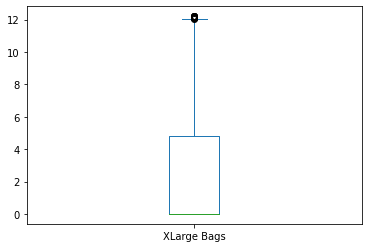

In [107]:
#As we are not able to see clearly unlesss we zoom , checking individualy

df['XLarge Bags'].plot.box()

In [108]:
Data_loss = ((18249-18211)/18249)*100

In [109]:
Data_loss

0.20823058797742344

### We have lost 0.21% approx of the data in removing the outliers from XLarge Bags which is acceptable so moving ahead and we dont need to treat further with any transformation techniques

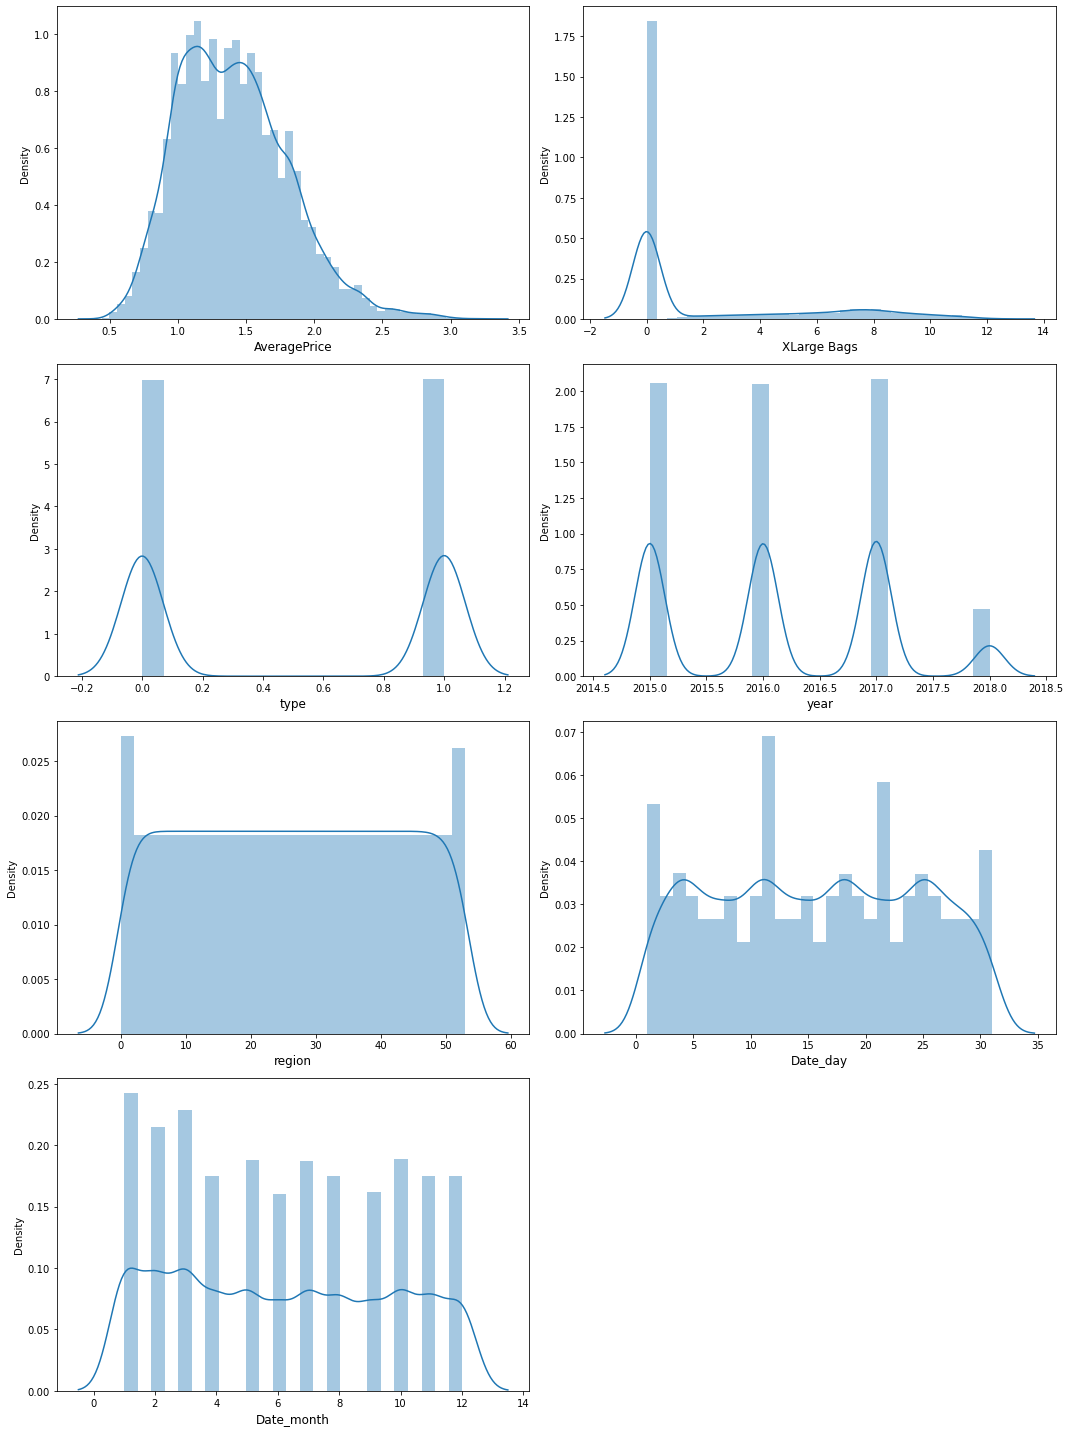

In [110]:
#Lets see how the data is distributed for every column after the treatment

plt.figure(figsize =(15,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=7:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

## Using Power Transformer to stabilize variance, makes the data more normal distribtion

In [111]:
# Again we Divide data into features and label

X = df.drop(columns = ['AveragePrice'])
y = df['AveragePrice']


In [112]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson') #use Shift+tab to know about the in features

In [113]:
X

array([[-7.10883309e-01, -1.00192377e+00, -5.07816011e-13,
        -2.01173403e+00,  1.22903833e+00,  1.49314200e+00],
       [-7.10883309e-01, -1.00192377e+00, -5.07816011e-13,
        -2.01173403e+00,  5.40828816e-01,  1.49314200e+00],
       [-7.10883309e-01, -1.00192377e+00, -5.07816011e-13,
        -2.01173403e+00, -2.15658003e-01,  1.49314200e+00],
       ...,
       [-7.10883309e-01,  9.98079928e-01,  8.20010726e-13,
         1.54819151e+00,  6.42654464e-01, -1.64141023e+00],
       [-7.10883309e-01,  9.98079928e-01,  8.20010726e-13,
         1.54819151e+00, -1.02061441e-01, -1.64141023e+00],
       [-7.10883309e-01,  9.98079928e-01,  8.20010726e-13,
         1.54819151e+00, -9.54842634e-01, -1.64141023e+00]])

In [114]:
pd.DataFrame(X).skew().sort_values()

3   -0.260862
4   -0.208500
5   -0.146836
1   -0.003844
2    0.000000
0    0.715867
dtype: float64

In [115]:
from sklearn.preprocessing import StandardScaler
#mean=0, and std=1
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.71088331, -1.00192377, -1.2205312 , -2.01173403,  1.22903833,
         1.493142  ],
       [-0.71088331, -1.00192377, -1.2205312 , -2.01173403,  0.54082882,
         1.493142  ],
       [-0.71088331, -1.00192377, -1.2205312 , -2.01173403, -0.215658  ,
         1.493142  ],
       ...,
       [-0.71088331,  0.99807993,  1.9709435 ,  1.54819151,  0.64265446,
        -1.64141023],
       [-0.71088331,  0.99807993,  1.9709435 ,  1.54819151, -0.10206144,
        -1.64141023],
       [-0.71088331,  0.99807993,  1.9709435 ,  1.54819151, -0.95484263,
        -1.64141023]])

# Using SelectKBest Feature Selection Method -1st Target - AveragePrice

Select KBest use f_classif function to find the best features, where f_classif uses Anova Test

In [116]:
# Again we Divide data into features and label

X = df.drop(columns = ['AveragePrice'])
y = df['AveragePrice']

In [117]:
from sklearn.feature_selection import SelectKBest, f_classif

In [118]:
best_features = SelectKBest(score_func = f_classif, k=6)

fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)


#concatenate dataframes

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_name', 'Score']   #name output columns

print(feature_scores.nlargest(6,'Score'))  #Print Best 4 features

  Feature_name      Score
1         type  53.053056
0  XLarge Bags  14.561476
2         year   3.102319
5   Date_month   3.037180
3       region   1.334220
4     Date_day   1.278597


### We see that the features type as well as XLargeBags is the best  as the score they have are greater than 5, but we are only performing this step as a way to analyze the data even further , but we will not remove any columns as the data shows that most of the column is good for prediction 

# Variance Inflation Factor

Checking for Multicollinearity problem to see if one feature is dependent on the other , we need to scale the dat first using MINMAX Scalar

In [119]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [120]:
X_scaled = mms.fit_transform(X)

In [121]:
X_scaled.shape

(18211, 6)

In [122]:
#Finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/(1 -R2))

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#chck Values
vif

vif     Features
0  2.152048  XLarge Bags
1  2.750831         type
2  2.424680         year
3  3.086233       region
4  3.050786     Date_day
5  2.621868   Date_month

We see that after we have skewed the data , the values are lesser than 5 for all the columns so we will not remove any columns and move to the next step

# Principal Component Analysis (PCA)

It is a dimension reduction technique and not a feature selection one.

and we are going to apply on the features only , it is mainly used if there are too many features and no correlation with the target

but its the final analysis we are going to do to chcek for multicollinearity problem

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca = PCA()

In [126]:
pca.fit_transform(X_scaled) #To scale the data with PCA so we can plot the graph to see whats the coverage 

array([[ 0.37509529, -0.69700232,  0.23842821,  0.53219866, -0.2264777 ,
        -0.29070707],
       [ 0.37484626, -0.69420264,  0.05614186,  0.51418671, -0.08197043,
        -0.28950153],
       [ 0.37459723, -0.69140297, -0.12614448,  0.49617475,  0.06253683,
        -0.28829599],
       ...,
       [-0.51184235,  0.76974312,  0.27559947, -0.47753696, -0.0140358 ,
        -0.10118094],
       [-0.51209138,  0.7725428 ,  0.09331312, -0.49554891,  0.13047146,
        -0.0999754 ],
       [-0.5123404 ,  0.77534248, -0.08897322, -0.51356087,  0.27497873,
        -0.09876985]])

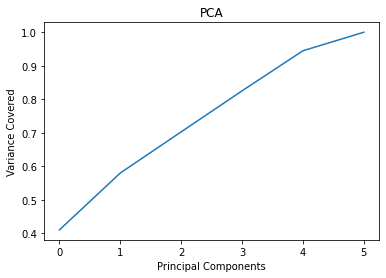

In [127]:
# lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

### We see that in order to cover 95% - 100% of the data we need to have only have 4 features and we can remove the rest , We will use the Kbest to decide which features are the best and see if we can elimfeatures at the lowestinate the 

as per Kbest:- 
1          type  61.524732

0  Total Volume  15.534377

2          year   3.405207

5    Date_month   3.282576

are the best 
the worst is 
region and Date_day


# Using SelectKBest Feature Selection Method -2nd Target - region

Select KBest use f_classif function to find the best features, where f_classif uses Anova Test

In [128]:
# Again we Divide data into features and label

X2 = df.drop(columns = ['region'])
y2 = df['region']

In [129]:
from sklearn.feature_selection import SelectKBest, f_classif

In [130]:
best_features = SelectKBest(score_func = f_classif, k=6)

fit = best_features.fit(X2,y2)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X2.columns)


#concatenate dataframes

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_name', 'Score']   #name output columns

print(feature_scores.nlargest(6,'Score'))  #Print Best 17 features

   Feature_name      Score
0  AveragePrice  69.125788
1   XLarge Bags  47.213898
2          type   0.089812
3          year   0.068777
5    Date_month   0.004822
4      Date_day   0.000330


### We see that the features AveragePrice,type as well as Total Volume is the best  as the score they have are greater than 5, but we are only performing this step as a way to analyze the data even further , but we will not remove any columns as the data shows that most of the column is good for prediction 

# Variance Inflation Factor

Checking for Multicollinearity problem to see if one feature is dependent on the other , we need to scale the dat first using MINMAX Scalar

In [131]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [132]:
X_scaled = mms.fit_transform(X2)

In [133]:
X_scaled.shape

(18211, 6)

In [134]:
#Finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/(1 -R2))

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X2.columns

#chck Values
vif

vif      Features
0  9.082854  AveragePrice
1  2.129778   XLarge Bags
2  4.562456          type
3  2.620151          year
4  3.119662      Date_day
5  3.099012    Date_month

We see that after we have skewed the data , the AveragePrice is showing some high variance so we must treat this column for the classification model for the rest ,the values are lesser than 5 for all the columns so we will not remove any columns and move to the next step

# Principal Component Analysis (PCA)

It is a dimension reduction technique and not a feature selection one.

and we are going to apply on the features only , it is mainly used if there are too many features and no correlation with the target

but its the final analysis we are going to do to chcek for multicollinearity problem

In [136]:
from sklearn.decomposition import PCA

In [137]:
pca = PCA()

In [138]:
pca.fit_transform(X_scaled) #To scale the data with PCA so we can plot the graph to see whats the coverage 

array([[ 0.37302534, -0.70000622,  0.22387894, -0.29188378, -0.29736156,
         0.03582656],
       [ 0.3718244 , -0.69717163,  0.08476234, -0.10472799, -0.29560896,
         0.04591794],
       [ 0.39667351, -0.69253305, -0.07131004,  0.07232383, -0.30103701,
        -0.09694631],
       ...,
       [-0.53188741,  0.77095362,  0.22348228, -0.06745735, -0.09068871,
         0.07130388],
       [-0.53545653,  0.77362422,  0.08590713,  0.12061699, -0.08828332,
         0.09530032],
       [-0.51711994,  0.77781179, -0.06592631,  0.3001948 , -0.09191621,
        -0.00932502]])

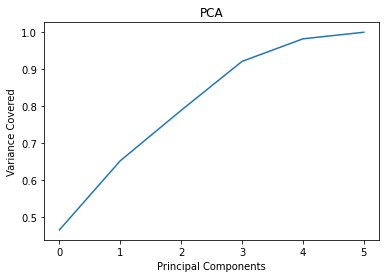

In [139]:
# lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

### We see that in order to cover 95% - 100% of the data we need to have only have 4 features and we can remove the rest , We usually in this case will opt to remove , but in this is dataset we will go ahead with it and only remove incase we really need to depends on the scores

# Creating the Model for 1st Label-AveragePrice - Choosing the Best Model

In [140]:
#Splitting the features and target  and dropping some features as we need only 4 features to cover 100% data 
X=df.drop(columns=['AveragePrice','region','Date_day'])
y=df['AveragePrice']

#Did not eliminate

# Linear Regression Model

In [141]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [142]:
import warnings
warnings.filterwarnings('ignore')

In [143]:
scores_test=[]
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = i)
    lr.fit(X_train,y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')
    scores_test.append(r2_score(y_test,pred_test))

At random state 0,the training accuracy is :-0.4232651841044437
At random state 0,the testing accuracy is :-0.4137171824238056


At random state 1,the training accuracy is :-0.4206721333077751
At random state 1,the testing accuracy is :-0.42138951411877856


At random state 2,the training accuracy is :-0.42215323298933727
At random state 2,the testing accuracy is :-0.4168318225709797


At random state 3,the training accuracy is :-0.4223079065663543
At random state 3,the testing accuracy is :-0.4162018490841176


At random state 4,the training accuracy is :-0.42176184535430505
At random state 4,the testing accuracy is :-0.4178526439786783


At random state 5,the training accuracy is :-0.417853394496851
At random state 5,the testing accuracy is :-0.42987555763748253


At random state 6,the training accuracy is :-0.4207679404298029
At random state 6,the testing accuracy is :-0.42103735392123454


At random state 7,the training accuracy is :-0.4160510712052806
At random state 7,the testing

# We have seen that the best random state for the observations is 91 but all are below 50% which is very low for the model and is not good fit for the data 

At random state 91,the training accuracy is :-0.4248741325289358


At random state 91,the testing accuracy is :-0.42342789648361234


We have chosen this as the difference between the two scores is very very less almost in decimals and the rest are not higher than this 

### Splitting again train test split with ideal Random state

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 91)

In [145]:
lr.fit(X_train,y_train)

LinearRegression()

In [146]:
pred_test=lr.predict(X_test)

In [147]:
print(r2_score(y_test,pred_test))

0.42080320805919713


# We observed that Linear Regression is doing very poorly with this data as we are getting 42.34% approx which is lesser than 50% itself


We will try other models cause we cant consider a model with less than 50% r2 score

# Cross-Validation of the model

In [148]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and the accuracy for testing is {Test_accuracy}")
    print('\n')

At cross fold2 the cv score is -3.3823407639832723 and accuracy score for training is -0.4342555017297285and the accuracy for testing is 0.42080320805919713


At cross fold3 the cv score is 0.0006692461484354428 and accuracy score for training is -0.4342555017297285and the accuracy for testing is 0.42080320805919713


At cross fold4 the cv score is -0.05868603904808767 and accuracy score for training is -0.4342555017297285and the accuracy for testing is 0.42080320805919713


At cross fold5 the cv score is 0.06141584847445971 and accuracy score for training is -0.4342555017297285and the accuracy for testing is 0.42080320805919713


At cross fold6 the cv score is -0.07123831219509584 and accuracy score for training is -0.4342555017297285and the accuracy for testing is 0.42080320805919713


At cross fold7 the cv score is 0.013617322180883502 and accuracy score for training is -0.4342555017297285and the accuracy for testing is 0.42080320805919713


At cross fold8 the cv score is -0.0341076

### We observe that we are getting really bad Cross val scores here we see that among the 10 states , 6 is the only one which is having the closest difference with the testing score still huge huge differnce @ 7% appox  , but this model isnt working well with the data so we will try other models as we have a very low r2 score 


### Plotting the linear Regression graph with actual and predicted values comparison

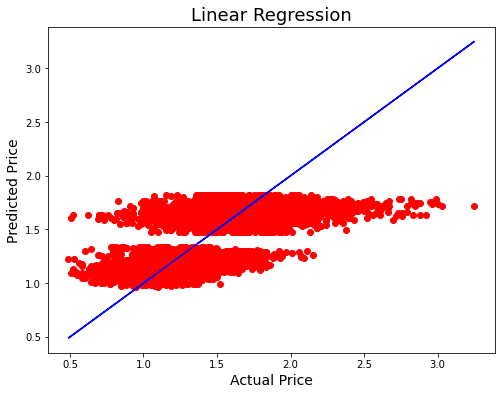

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### We see that the model is doing exceptionally bad in predicting , here we see the actual and predicted are not on the same line which is really really bad and the data is not showing a trend as well

### Regularization of the Linear Model

In [150]:
from sklearn.model_selection import GridSearchCV #to select the pest parameters for hyperparameter tuning
from sklearn.model_selection import cross_val_score #to check the difference from the earlier score without hyper parameter tuning

In [151]:
from sklearn.linear_model import Lasso

parameters ={'alpha' : [.0001, .001, .01, .1, 1, 10],
            'random_state' : list(range(0,15))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train, y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


## Final model training for Linear Regression

In [152]:
ls = Lasso(alpha= 0.0001, random_state= 0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)
ls_score_training*100

42.0623048690066

We are getting a bad lasso score of 42.48% which is very high to the cross val score 7% approx for training we got earlier so we cant consider the model is doing very bad for this dataset

A reason for the cross val score to be this bad is due to the nature of the XLarge Bags as well as the other properties have such extreme values , even after treatment we see that the model is not able to get a normally distributed dataset to make a better prediction or maybe the model doesnt work well with this dataset

### Checking MSE,RMSE score 

In [153]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 0.23842355188038442
MSE: 0.09590165227691295
RMSE: 0.3096799190727629


We see good valuesas in lesser the better in MAE , MSE and RMSE in the linear model so we will move to other models as the scores are less than 50% 

### Now let us use different model to check which is the best one 

### Decision Tree Regressor

In [154]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
pred_test =dt.predict(X_test)
dfs = r2_score(y_test,pred_test)
print('R2 Score :',dfs*100)

dfscore = cross_val_score(dt,X,y,cv=7)
dfc =dfscore.mean()
print('Cross Val Score :',dfc*100)


R2 Score : 44.28119730834156
Cross Val Score : -10.445908493001731


### We observe that for Decision tree regressor :-
- The model is  at R2 Score of 69.95 %approx which is way better that linear regression
- we also see that the cross val score is also very bad compared to linear , and we cannot choose this model as well as the score is -15.25 % approx 
- there is very high  difference between the r2 score  75.57% and cross val score -15.25 %
- we see that the score is much much better  than Linear regression model of 42% approx
- tryin the next model which is knn as we need to have a closer difference btw the cross val and R2 Score 


In [155]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 0.22810169012438533
MSE: 0.09225750755828577
RMSE: 0.30373920978083446


We again see much much lower score in term of mse and mae score compared to Linear Regression model but we cannot chose the model as the cross val score is much lower

### K- Nearest Neighbors

In [156]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
pred_test =knn.predict(X_test)
knns = r2_score(y_test,pred_test)
print('R2 Score :',knns*100)

knnscore = cross_val_score(knn,X,y,cv=7)
knnc =knnscore.mean()
print('Cross Val Score :',knnc*100)


R2 Score : 40.55863678820671
Cross Val Score : -18.365195635324945


### We observe that for K-nearest neighbors :-
- The model is not at all working well for the data set and we see that the score is a little  compared to linear regression model but lower than Decision tree @ 47.73% approx
- we also see that the cross val score is also very bad compared to linear  , and we cannot choose this modelsame as  the linear model but its better that Decision tree cv score by 7-8 % approx 
- there is very high  difference between the r2 score  52.73% and cross val score  -13.08% approx 
- tryin the next model which is Enseble techniques , and we will use Random Forest Regressor 


In [157]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 0.2314478365912585
MSE: 0.09842121063035361
RMSE: 0.313721549515416


We again see much much lower score in term of mse and mae score compared to Linear Regression model and Decision Tree

### Random Forest Regressor

In [158]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_decision =rf.predict(X_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=7)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)


R2 Score : 50.07533932144709
Cross Val Score : 2.5960664494929953


### We observe that for Random Forest Regressor :-

- The model is doing much better than the 3 models we test before , the R2 score is @ 83.32% approx which is much better than the rest and our cross val is still lower@ 13.71% approx
- we also see that the cross val score is a little better compared to linear and tree, but  we see the Difference between the R2 score and cv score @ 13.71% is too high  
- we see that the score is higher than Linear regression model of 42% approx
- tryin the next model which is Ensemble techniques , and we will use Ada boosted Trees 



In [159]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 0.2314478365912585
MSE: 0.09842121063035361
RMSE: 0.313721549515416


We see that the MAE and MSE scores are also the same  and this model is  working well with the dataset but to get a closer difference between cv score as well as R2 score lets test more

### ADA Boost Regressor

In [160]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

ada.fit(X_train,y_train)
ada.score(X_train,y_train)
pred_decision =ada.predict(X_test)

adas = r2_score(y_test,pred_decision)
print('R2 Score :',adas*100)

adascore = cross_val_score(ada,X,y,cv=7)
adac =adascore.mean()
print('Cross Val Score :',adac*100)


R2 Score : 46.38337803082081
Cross Val Score : 2.0759408085082347


In [161]:
#Checking MAE MSE and RMSE scores
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_decision))
print('MSE:', metrics.mean_squared_error(y_test, pred_decision))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_decision)))

MAE: 0.22941086448601508
MSE: 0.08877678032575236
RMSE: 0.29795432590541854


### We observe that for ADA Boost Regressor :-
- The model is not  working well for the data set and we see that the score is very low compared to Random forest and  Decision Tree as well as Knn Regressor and lower than Linear as well by a small margin
- we also see that the cross val score is a much much lower  compared to linear and all the models ,   we cannot choose this over the linear model  
- there is very high  difference between the r2 score  47.27% and cross val score  -5.65% 
- we see that the score is lesser than Linear regression model of 42% approx
- tryin the next model which is Xgboost model 


### Xgboost Regressor

In [162]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)
pred_decision =xgb.predict(X_test)

xgbs = r2_score(y_test,pred_decision)
print('R2 Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=9)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)



R2 Score : 51.5632353298051
Cross Val Score : 16.7393432183973


In [163]:
#Checking MAE MSE and RMSE scores
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_decision))
print('MSE:', metrics.mean_squared_error(y_test, pred_decision))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_decision)))

MAE: 0.2117694052392091
MSE: 0.08020012934212618
RMSE: 0.2831962735314965


### We observe that for Xtreme Gradient Boost Regressor :-

- The model is  working well for the data set and we see that the score is the higest compared to ll the models we tested before
- we also see that the cross val score is a much much better  compared to linear and all the models ,   we can choose this over the other models as this is the most closest difference between the cv and R2 score 
- there is very high  difference between the r2 score  87.36% and cross val score  46.04% approx , but closest of all themodels  
- we see that the score is highest  model of 87.36% approx
 


### So in conclusion we can choose Xgboost as the BEST MODEL for the dataset 

### Hyper parameter Tuning with Xgboost Regressor  

In [164]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

#Creating parameters to pass in RandomizedSearchCV

parameters = {'n_estimators' :[100,150,200,250,300],
             'max_depth': [5,6,7,8,9,],
             'subsample': [0.01,0.001,0.1,0.5,1],
              'learning_rate': [0.05, 0.1,0.3,0.5],
              'colsample_bytree': [0.5,0.6,0.7,0.8,1]
             }
xgb = xgb.XGBRegressor()  
clf= RandomizedSearchCV(xgb,parameters,n_jobs=-1)
clf.fit(X_train,y_train)

print(clf.best_params_)

{'subsample': 0.01, 'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [165]:
import xgboost as xgb
xgb = xgb.XGBRegressor(subsample = 1,n_estimators = 250, max_depth = 9, learning_rate = 0.3, colsample_bytree = 0.7)

xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)
pred_decision =xgb.predict(X_test)

xgbs = r2_score(y_test,pred_decision)
print('R2 Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=9)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)



R2 Score : 49.80483786780994
Cross Val Score : 8.062571001275963


In [166]:
#Checking MAE MSE and RMSE scores
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_decision))
print('MSE:', metrics.mean_squared_error(y_test, pred_decision))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_decision)))

MAE: 0.21838804018515795
MSE: 0.08311163065413797
RMSE: 0.288290878548278


### OBSERVATIONS ON FINAL SCORES FROM XGBoost Regressor

- We see that the accuracy score has dipped down a little bit from un-tuned Model which has 87% approx  but  we can tweak hyperparameter tuning on the Xgboost Model we will get a better score , here we are getting 86.59%approx

- We see that the Cross val score is a little higher than the last time we had @ 48.73% approx

- We also see that we have good MAE and MSE scores compared to the rest of the models and we have chosed the actuall best model for this data set even with all the constraints

- So fnally we choose this model and move it into saved folder to be used - XGboost Regressor 

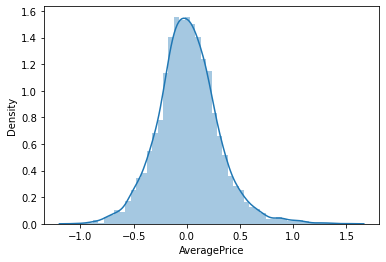

In [167]:
#Plotting distplot to show equillibrium 

sns.distplot(y_test-pred_decision)
plt.show()

We see a very good normally distributed graph here with our model 

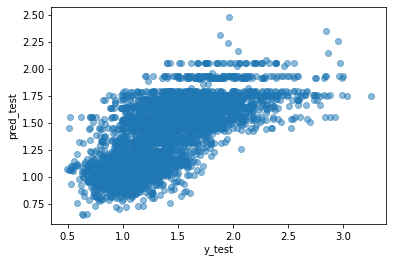

In [168]:
plt.scatter(y_test, pred_decision, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred_test")
plt.show()

We see somewhat of a linear graph and we see the trend is positive as well so we will move to saving the model now

In [169]:
import pickle
filename = 'Avacado_reg.pkl'
pickle.dump(xgb,open(filename,'wb'))

# Conclusion

In [170]:
loaded_model = pickle.load(open('Avacado_reg.pkl','rb'))
result = loaded_model.score(X_test,y_test)
print(result*100)

49.80483786780994


In [171]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Orignal'])

In [172]:
conclusion

0         1         2         3         4         5     \
Predicted  1.635475  1.138926  0.920736  1.045556  1.556755  1.143428   
Orignal    1.635475  1.138926  0.920736  1.045556  1.556755  1.143428   

               6         7         8         9     ...     4543      4544  \
Predicted  1.618598  1.795716  1.636445  1.420518  ...  1.49083  1.125694   
Orignal    1.618598  1.795716  1.636445  1.420518  ...  1.49083  1.125694   

              4545     4546      4547      4548      4549     4550      4551  \
Predicted  0.91337  1.75758  1.749108  1.596667  1.332619  1.52421  1.752986   
Orignal    0.91337  1.75758  1.749108  1.596667  1.332619  1.52421  1.752986   

               4552  
Predicted  1.574207  
Orignal    1.574207  

[2 rows x 4553 columns]

### We see that the model has predicted the charges on 3988 columns againest the actual charges , - the Xgboost Regressor which we have chosen as the best one 

# Creating the Model for 2nd Label-Region - Choosing the Best Model

# Checking Relationship with 2nd Label Region

<AxesSubplot:>

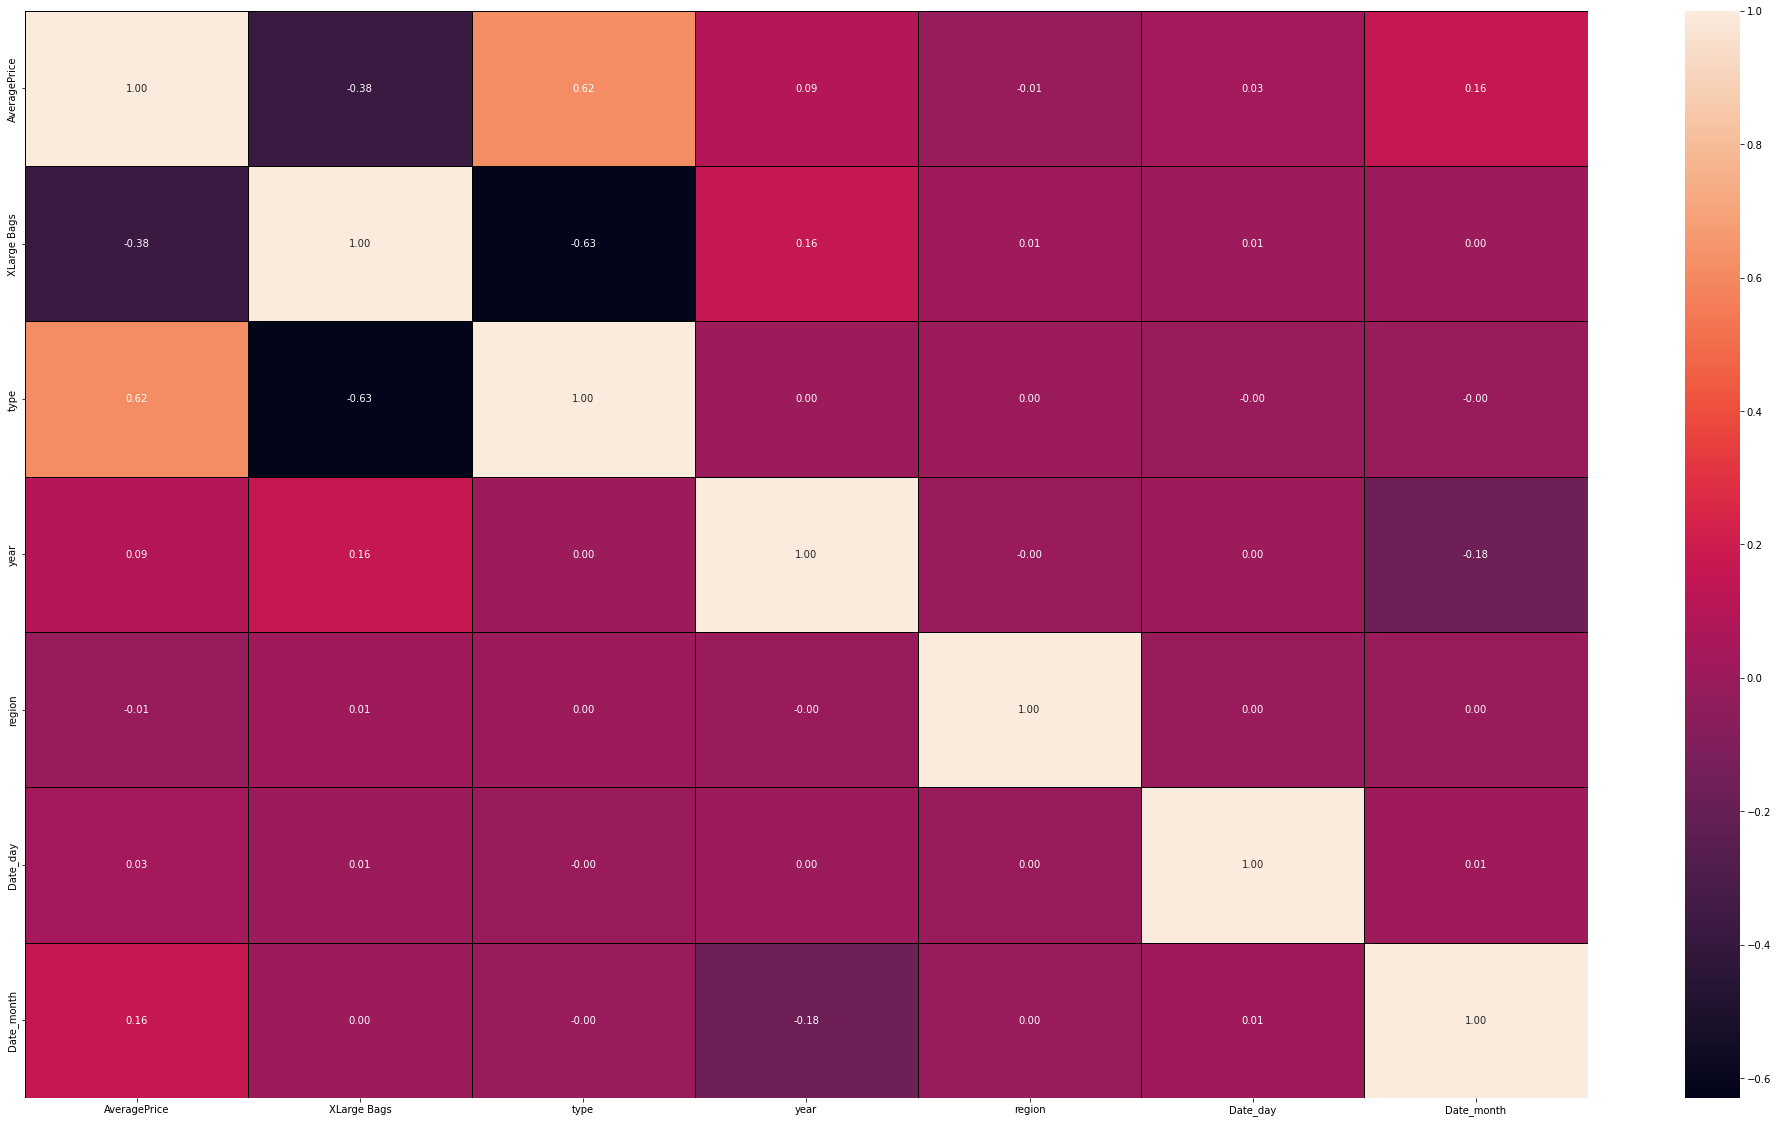

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

In [174]:
df.corr()['region'].sort_values()

AveragePrice   -0.009697
year           -0.002950
Date_day        0.000178
Date_month      0.000609
type            0.003012
XLarge Bags     0.007140
region          1.000000
Name: region, dtype: float64

In [177]:
df

AveragePrice  XLarge Bags  type  year  region  Date_day  Date_month
0              1.33          0.0     0  2015       0        27          12
1              1.35          0.0     0  2015       0        20          12
2              0.93          0.0     0  2015       0        13          12
3              1.08          0.0     0  2015       0         6          12
4              1.28          0.0     0  2015       0        29          11
...             ...          ...   ...   ...     ...       ...         ...
18244          1.63          0.0     1  2018      53         4           2
18245          1.71          0.0     1  2018      53        28           1
18246          1.87          0.0     1  2018      53        21           1
18247          1.93          0.0     1  2018      53        14           1
18248          1.62          0.0     1  2018      53         7           1

[18211 rows x 7 columns]

<AxesSubplot:>

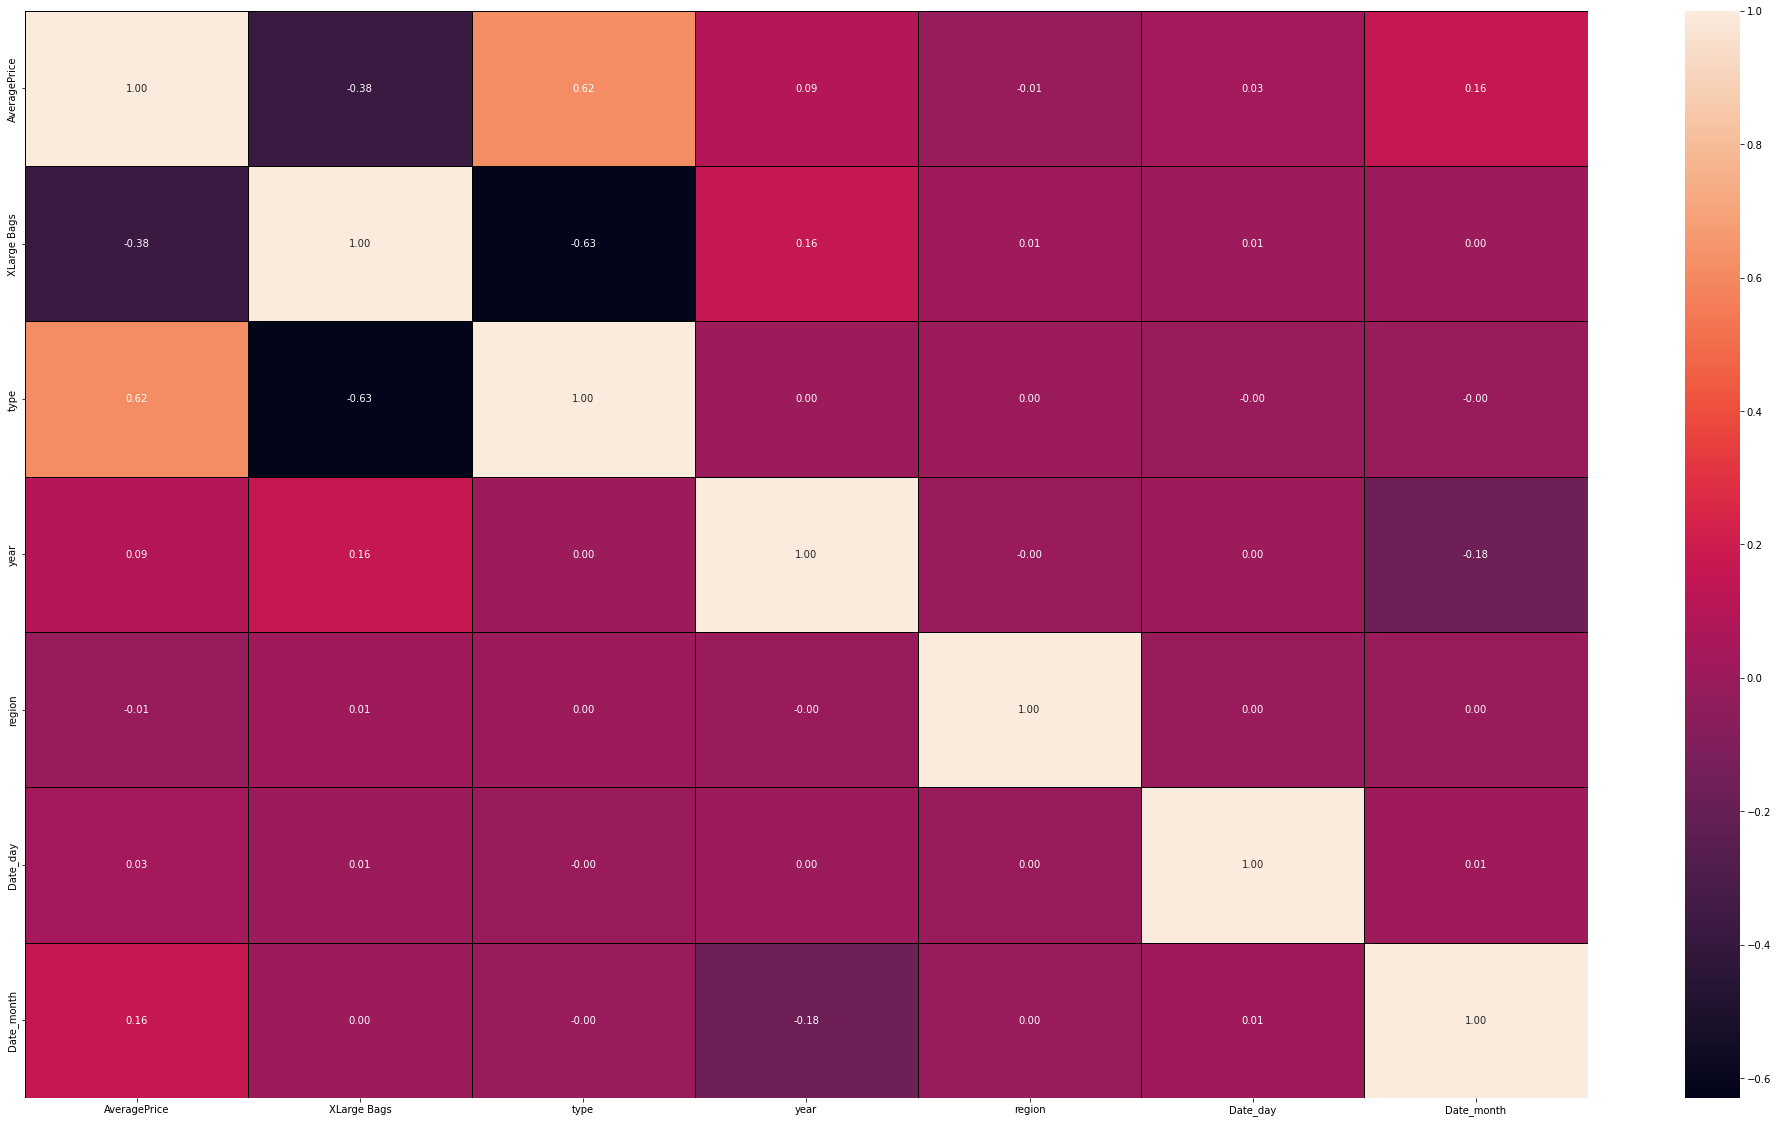

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

## Checking for Outliers 

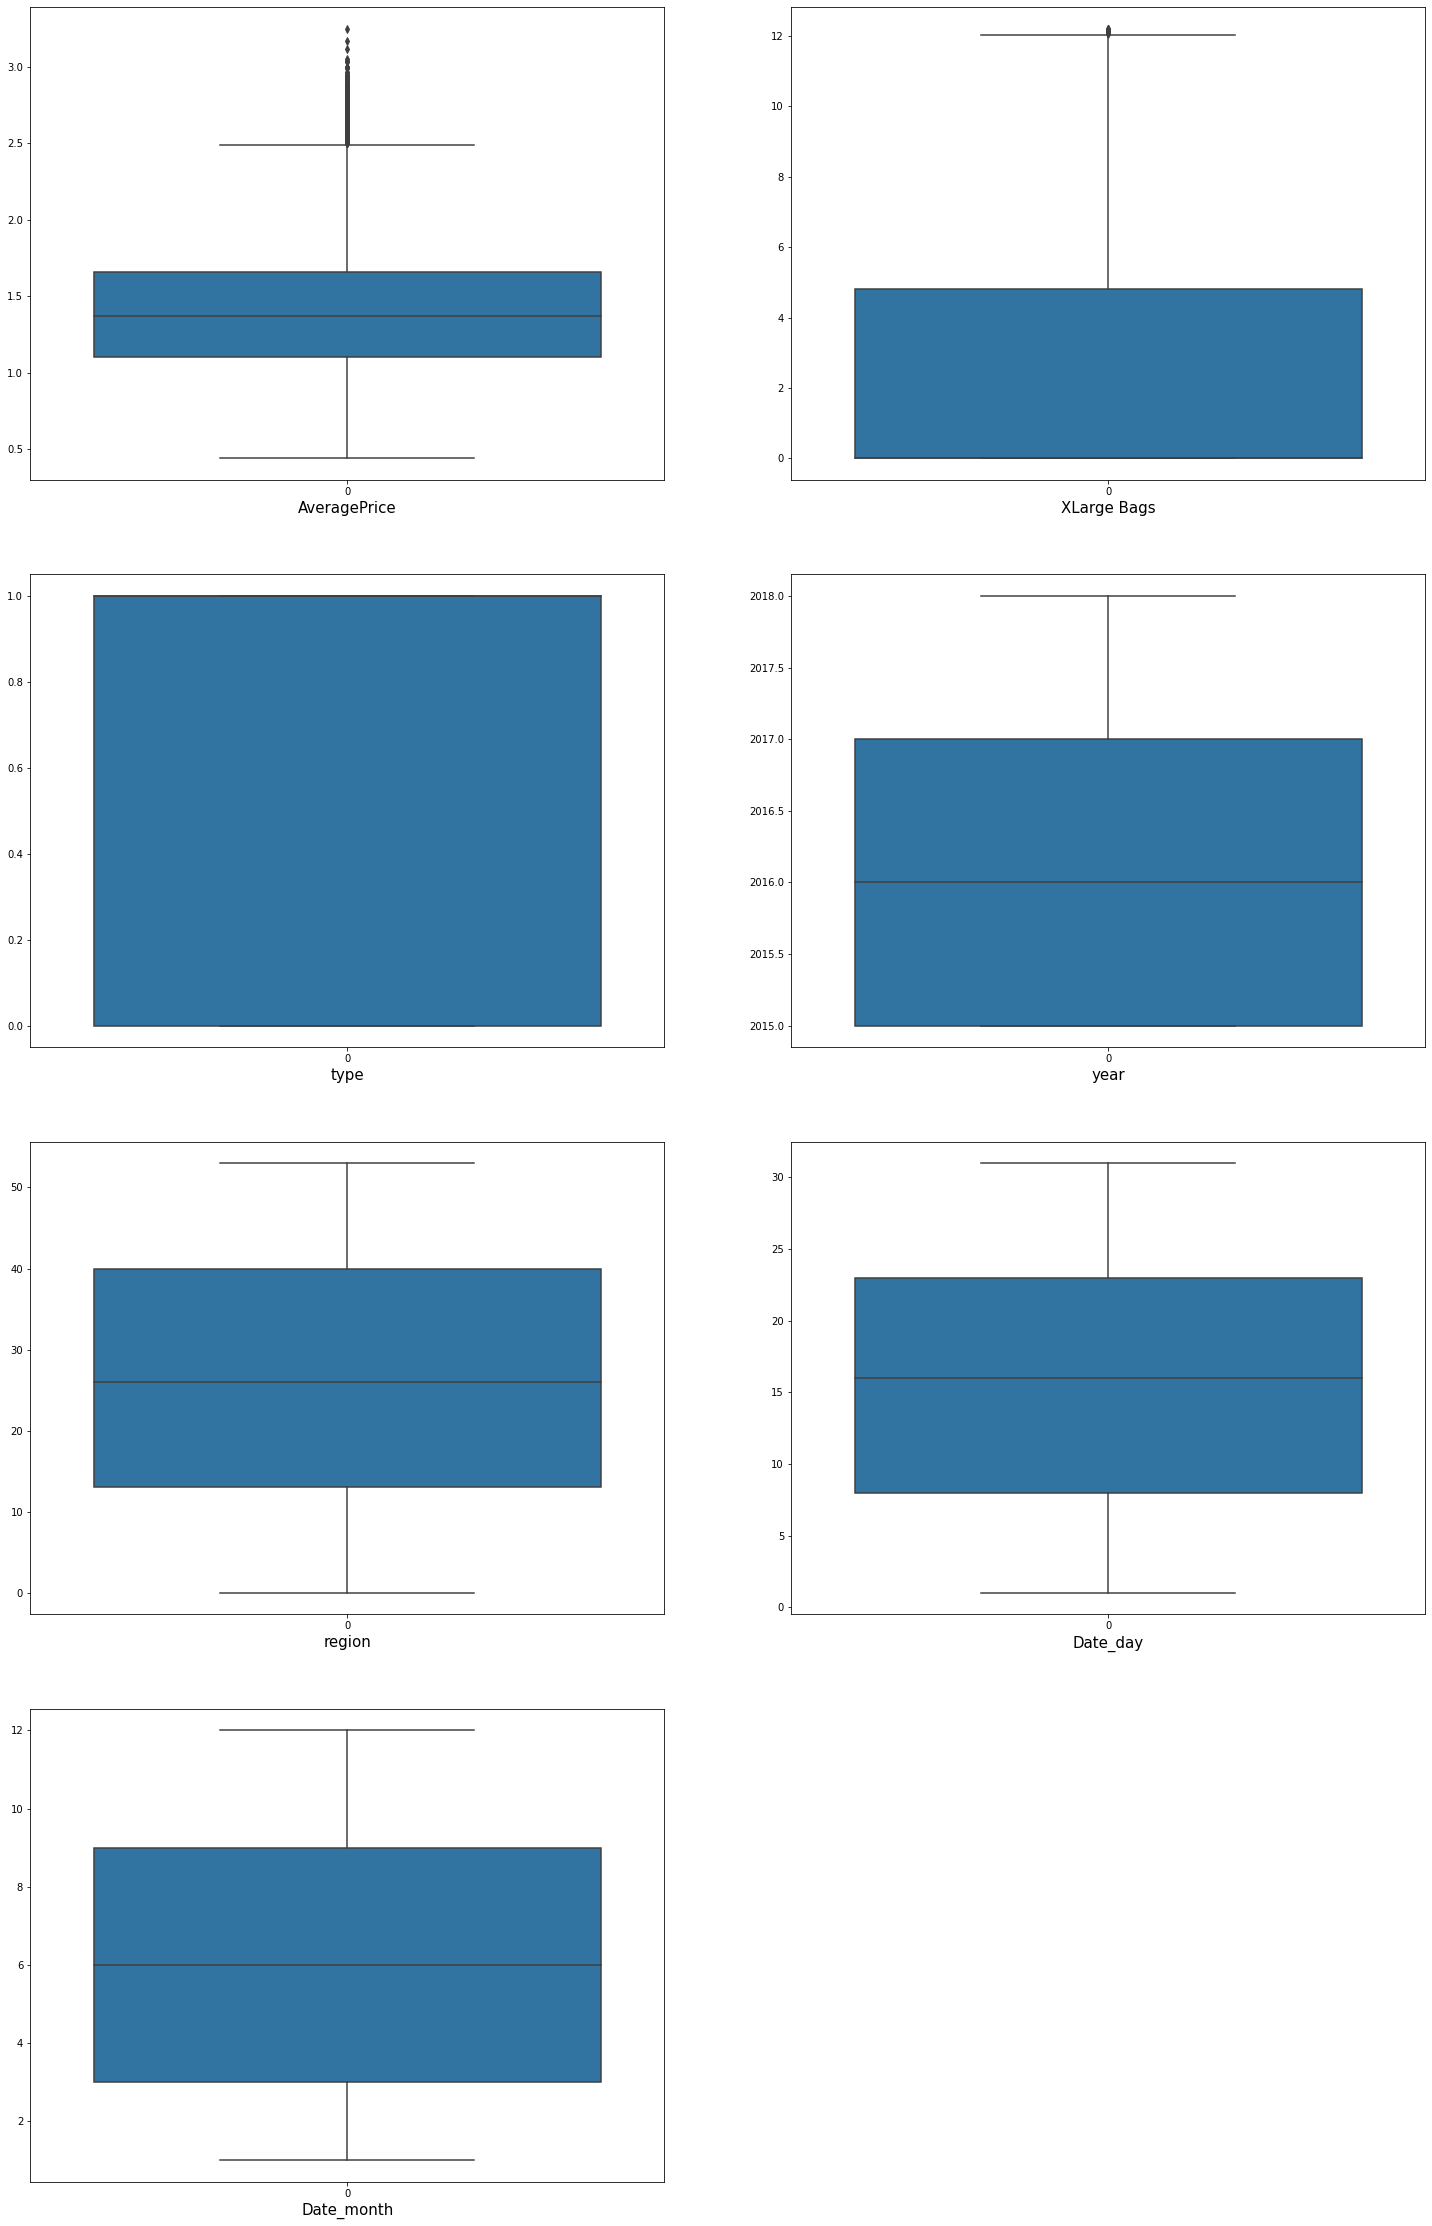

In [179]:
#Lets visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(25,40))
graph = 1

for column in df:
    if graph <=7: # as there are 9 columns in data
        plt.subplot(4,2,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

# Find the Inter Quantile Range to identify outliers

In [180]:

#ist quantile
q1 = df.quantile(0.25)

#3rd quantile
q3 = df.quantile(0.75)

#IQR
iqr = q3 - q1

In [181]:

AveragePrice_high = (q3['AveragePrice'] + (1.5 * iqr['AveragePrice']))
print (AveragePrice_high)

index = np.where(df['AveragePrice'] > AveragePrice_high)


df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

2.4999999999999996
(18002, 7)


index  AveragePrice  XLarge Bags  type  year  region  Date_day  \
0          0          1.33          0.0     0  2015       0        27   
1          1          1.35          0.0     0  2015       0        20   
2          2          0.93          0.0     0  2015       0        13   
3          3          1.08          0.0     0  2015       0         6   
4          4          1.28          0.0     0  2015       0        29   
...      ...           ...          ...   ...   ...     ...       ...   
17997  18244          1.63          0.0     1  2018      53         4   
17998  18245          1.71          0.0     1  2018      53        28   
17999  18246          1.87          0.0     1  2018      53        21   
18000  18247          1.93          0.0     1  2018      53        14   
18001  18248          1.62          0.0     1  2018      53         7   

       Date_month  
0              12  
1              12  
2              12  
3              12  
4              11  
...           ...  
17997           2  
17998           1  
17999           1  
18000           1  
18001           1  

[18002 rows x 8 columns]

In [182]:
Data_loss= ((18249-18040)/18249)*100

In [183]:
Data_loss

1.1452682338758287

### Here we see that we have again treated the ouliers from the AveragePrice again and lost 1.15% approx data which is within the accepatable limit of data loss so that we can avoid biased models

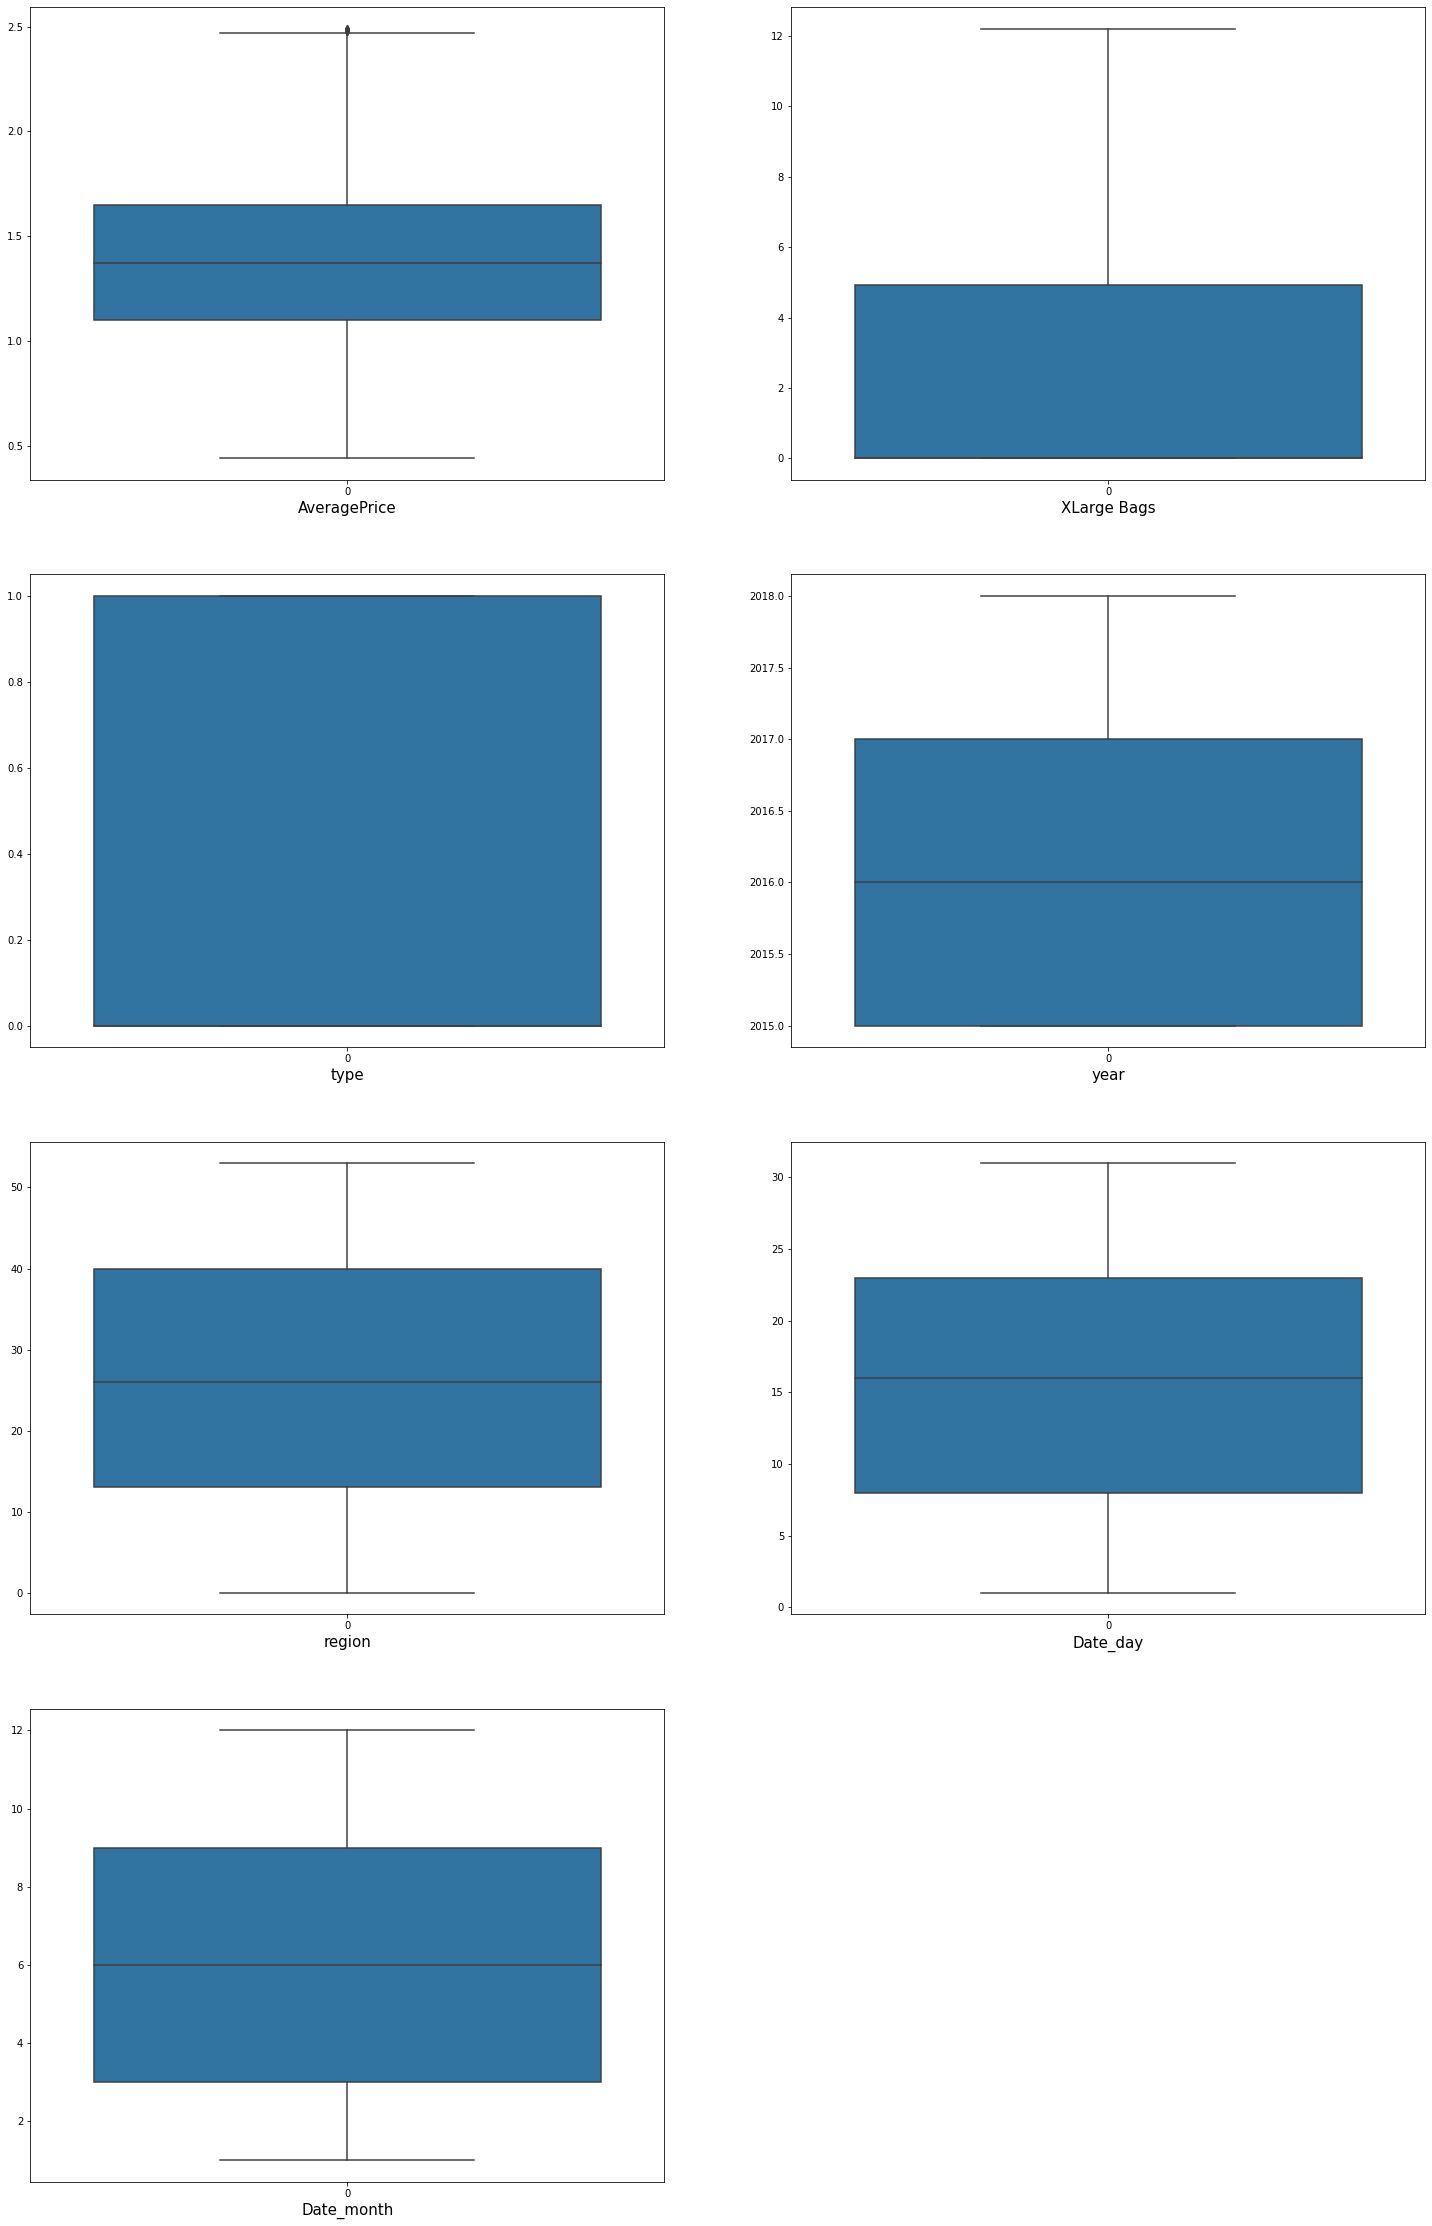

In [184]:
#Lets visualize the data
plt.figure(figsize =(25,40))
graph = 1

for column in df:
    if graph <=7: # as there are 9 columns in data
        plt.subplot(4,2,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

# Considering the outlier removal with Zscore 

In [185]:
df.shape

(18002, 7)

In [186]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [187]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

AveragePrice  XLarge Bags  type  year  region  Date_day  Date_month
0              1.33          0.0     0  2015       0        27          12
1              1.35          0.0     0  2015       0        20          12
2              0.93          0.0     0  2015       0        13          12
3              1.08          0.0     0  2015       0         6          12
4              1.28          0.0     0  2015       0        29          11
...             ...          ...   ...   ...     ...       ...         ...
18244          1.63          0.0     1  2018      53         4           2
18245          1.71          0.0     1  2018      53        28           1
18246          1.87          0.0     1  2018      53        21           1
18247          1.93          0.0     1  2018      53        14           1
18248          1.62          0.0     1  2018      53         7           1

[18002 rows x 7 columns]

In [188]:
df_new_z.shape

(18002, 7)

We have used Zscore as well to reduce even more outliers but we havent lost any data , moving to next

In [189]:
# Again we Divide data into features and label

X = df_new_z.drop(columns = ['region','Date_day','Date_month'])
y = df_new_z['region']

# We have opted to drop the day and month as we have found out in earlier PCA analysis that we need only 4 featres to cover 95% to 100% of data and with Kbest we see that the score for features are:-

 Feature_name      Score
1    Large Bags  72.334861
0  AveragePrice  57.231926
2          type  20.493491
3          year   2.613185
5    Date_month   0.366822
4      Date_day   0.040331

# So we have opted to remove the day and month and create the model with 4 features to impove dimensionality reduction 

In [190]:
X

AveragePrice  XLarge Bags  type  year
0              1.33          0.0     0  2015
1              1.35          0.0     0  2015
2              0.93          0.0     0  2015
3              1.08          0.0     0  2015
4              1.28          0.0     0  2015
...             ...          ...   ...   ...
18244          1.63          0.0     1  2018
18245          1.71          0.0     1  2018
18246          1.87          0.0     1  2018
18247          1.93          0.0     1  2018
18248          1.62          0.0     1  2018

[18002 rows x 4 columns]

In [191]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18002, dtype: int32

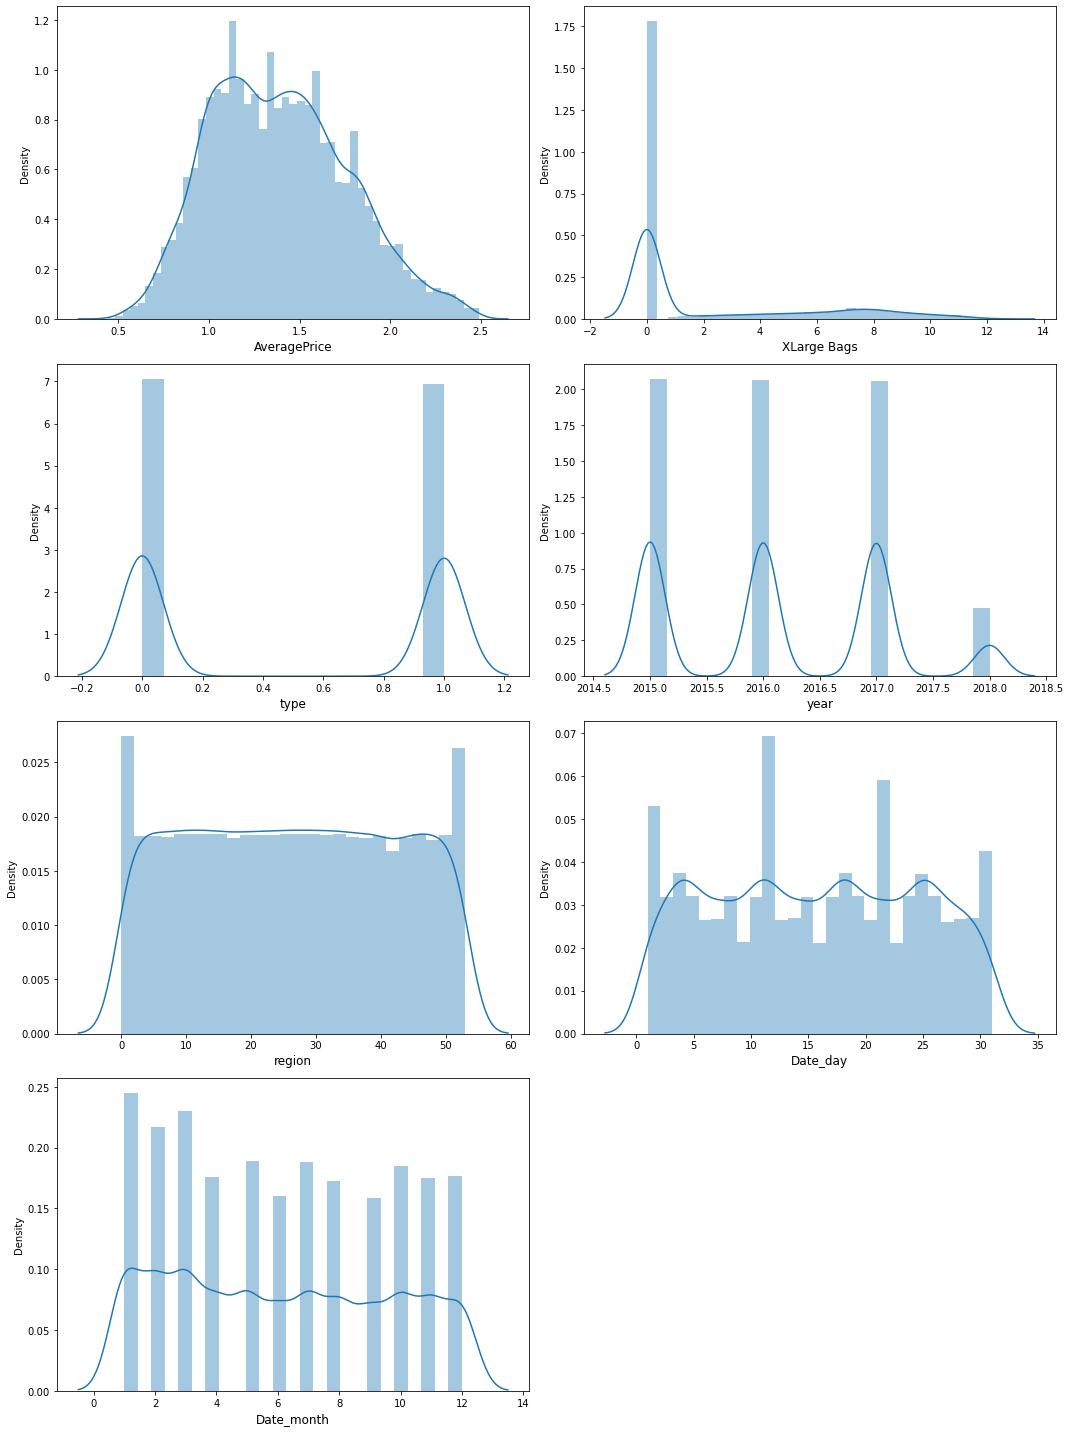

In [192]:
#Lets see how the data is distributed for every column after the treatment

plt.figure(figsize =(15,20), facecolor = 'white')
plotnumber = 1

for column in df_new_z:
    if plotnumber <=7:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

### Since we have already scaled the data now we will go ahead with model building 

### Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = i)
    lr.fit(X_train,y_train)
    pred_train = lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
    print('\n')

At random state 0,the training accuracy is :-0.05295904007110584
At random state 0,the Testing accuracy is :-0.04821150855365474


At random state 1,the training accuracy is :-0.043330123694541145
At random state 1,the Testing accuracy is :-0.03532548322594979


At random state 2,the training accuracy is :-0.033923413080512554
At random state 2,the Testing accuracy is :-0.021550766496334146


At random state 3,the training accuracy is :-0.052144285608473444
At random state 3,the Testing accuracy is :-0.047544990002221725


At random state 4,the training accuracy is :-0.05132953114584105
At random state 4,the Testing accuracy is :-0.03399244612308376


At random state 5,the training accuracy is :-0.049403747870528106
At random state 5,the Testing accuracy is :-0.04732281715174406


At random state 6,the training accuracy is :-0.051181393970816974
At random state 6,the Testing accuracy is :-0.05043323705843146


At random state 7,the training accuracy is :-0.03570105918080142
At random s

### We see that this model does not work well with the data , we see that the scores are lesser than 10% :-
    
    - we are getting 
     
    At random state 78,the training accuracy is :-0.09290465631929047
    
    At random state 78,the Testing accuracy is :-0.09090909090909091

- the training score and Testing score are really close to each other here
- both the train and test score are really low so we cannot use this model  


### Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 78) 

# as the best random state we have chosen is 78

### We are creating a method called Metric to allow us to show the metrics of each classification model we use , so we dont have to code it again 

In [ ]:
#Write one function and call as many times to check accuracy_score of different models

def metric_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("\n===============================Train Result=============================")
        
        print(f"Accuracy score : {accuracy_score(y_train,y_pred) * 100: .2f}%")
        
    elif train == False:
        pred = clf.predict(X_test)
        
        print("\n===============================Test Result===============================")
        print(f"Accuracy Scorre : {accuracy_score(y_test,pred) * 100: .2f}%")
        
        
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2)) ##Model Confidence /Accurancy
        

In [ ]:
#Call the function and pass dataset to check the train score and the test score

metric_score(lr,X_train,X_test,y_train,y_test,train=True) #This is for the Training Score

metric_score(lr,X_train,X_test,y_train,y_test,train=False) #This is for the Testing Score

### We see that this model is performing very poorly with this dataset and we see precision accuracy,f1 score and support all doing so poorly so we can safely say that logistic Regression does not work well with the model 

In [ ]:
print(confusion_matrix(y_test,pred_test))  

Showing the Confusion matrix is pointless as we have 53 classes and we cannot study each of them seperately

### Cross-Validation of the model

In [ ]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

We see very low Cv scores as well the highest in this is cv 6 which shows 7.88% which is drastically bad for the model so lets move with the other models 

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 78) #as we have seen a good score on 17th state
dt.fit(X_train,y_train)
pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)
print(f"At random state {322},the training accuracy is :-{accuracy_score(y_train,pred_train)}")
print(f"At random state {322},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
print('\n')


In [ ]:
#Call the function and pass dataset to check the train score and the test score

metric_score(dt,X_train,X_test,y_train,y_test,train=True) #This is for the Training Score

metric_score(dt,X_train,X_test,y_train,y_test,train=False) #This is for the Testing Score

### Observations from the Decision Tree Classifier :-
    - We see that the training score is boosted all the way to 99.80% which is great but the testing score is fallen short drastically @ 28.12% which shows clear overfitting problem with the data , also we see that the F1 score is averaging between 20-70% but is not uniform and is very low for some as well as there is drastic extreme values in it
    
    - the model is a little better that Logistic regression but we cant use this model as its giving lower than 50% accuracy which is bare minimum for any model 

In [ ]:
#Cross validation of the model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dt,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

Again we see similar trend of the Cv score being in the 16-19% range approx which is really bad for the model and shows that the model is not working well with the data , So we will have to check with other models 

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_decision =rf.predict(X_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=9)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)
print(confusion_matrix(y_test,pred_test)) 

In [ ]:
#Call the function and pass dataset to check the train score and the test score

metric_score(rf,X_train,X_test,y_train,y_test,train=True) #This is for the Training Score

metric_score(rf,X_train,X_test,y_train,y_test,train=False) #This is for the Testing Score

### Observations of Random Forest Classifier :-
    - We see that the training score is boosted all the way to 99.79% lower than decision tree which is great but the testing score is fallen short drastically @ 33.59% which shows clear  problem with the data , also we see that the F1 score is averaging between 10-70% approx but is not uniform and is very low for some as well as there is drastic extreme values in it
    
    - the model is a  better that Logistic regression and Decision Tree but again we cant use this model as its giving lower than 50% accuracy which is bare minimum for any model 

### XgBoost

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)
pred_decision =xgb.predict(X_test)

xgbs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=9)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)
print(confusion_matrix(y_test,pred_test)) 

In [ ]:
#Call the function and pass dataset to check the train score and the test score

metric_score(xgb,X_train,X_test,y_train,y_test,train=True) #This is for the Training Score

metric_score(xgb,X_train,X_test,y_train,y_test,train=False) #This is for the Testing Score

### Observations of  XGboost Classifier :-
    - We see that the training score is boosted all the way to 86.15% lower than decision tree and Random forest but the testing score is fallen short drastically @ 33779% which shows clear  problem with the data , also we see that the F1 score is averaging between 10-70% approx but is not uniform and is very low for some as well as there is drastic extreme values in it
    
    - the model is a  better that Logistic regression and Decision Tree but again we cant use this model as its giving lower than 50% accuracy which is bare minimum for any model 

### SVC

In [ ]:
from sklearn.svm import SVC

svc= SVC()

svc.fit(X_train,y_train)
svc.score(X_train,y_train)
pred_decision =svc.predict(X_test)

svcs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',svcs*100)

svcscore = cross_val_score(svc,X,y,cv=9)
svcc =svcscore.mean()
print('Cross Val Score :',svcc*100)
print(confusion_matrix(y_test,pred_test))

In [ ]:
#Call the function and pass dataset to check the train score and the test score

metric_score(svc,X_train,X_test,y_train,y_test,train=True) #This is for the Training Score

metric_score(svc,X_train,X_test,y_train,y_test,train=False) #This is for the Testing Score

### Observations from the SVC Classifier :-
    - We see that this model is not at all doing well with the data , we see the lowest train and test score of 1.98% and 1.51% which shows that this not a good model for the dataset we used and we will choose the Random Forest as the one we will use , Even though the scores are very low , we understand that there is a problem with the datat and we will tune it in the next step

### Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

#Creating parameters to pass in RandomizedSearchCV

parameters = {'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split': [1, 2, 3, 4 ,5],
             'min_samples_leaf': [1, 3, 4, 5, 6, 7],
             'n_estimators' : [100,200,300,400,500]
             }

RCV = RandomizedSearchCV(estimator = rf,param_distributions = parameters, n_iter = 100, cv = 9, verbose=2, random_state=35, n_jobs = -1,scoring='accuracy')
RCV.fit(X_train,y_train) #fitting data into the model
RCV.best_params_ #printing the best parameters found by the RandomizedSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators = 100,min_samples_split= 2,min_samples_leaf= 7,max_features= 'log2',criterion= 'entropy')

rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_decision =rf.predict(X_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=9)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)
print(confusion_matrix(y_test,pred_test)) 

We see that after tuning we were able to increase the testing score from 33 to 37% approx and we have a cross val score of 24% approx , we see that this is a really bad score for a modelas even 50% is considered a bad model , but considering the data we ahve acquired this even after all the preprocessing and deep EDA we have been able to get this score , so we will save the model 

In [ ]:
RCV_pred=RCV.best_estimator_.predict(X_test) #predicting with the best parameters
accuracy_score(y_test,RCV_pred) #Checking Final Accuracy

In [ ]:
import pickle
filename = 'Avacado_class.pkl'
pickle.dump(rf,open(filename,'wb'))

### Conclusion

In [ ]:
loaded_model = pickle.load(open('Avacado_class.pkl','rb'))
result = loaded_model.score(X_test,y_test)
print(result*100)

In [ ]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],RCV_pred[:]],index=['Predicted','Orignal'])

In [ ]:
conclusion

### We have 4510 columns where the model has predicted and Actuals and the model we have chosen is Random forest Classifier